In [1]:
import sys
sys.path.append("..")
import numpy as np
import random

In [2]:
# use preloaded keras datasets and models
! mkdir -p ~/.keras/datasets
! mkdir -p ~/.keras/models
! ln -s $(realpath ../readonly/keras/datasets/*) ~/.keras/datasets/
! ln -s $(realpath ../readonly/keras/models/*) ~/.keras/models/

ln: failed to create symbolic link '/home/mariele/.keras/datasets/cifar-10-batches-py.tar.gz': File exists
ln: failed to create symbolic link '/home/mariele/.keras/datasets/mnist.npz': File exists
ln: failed to create symbolic link '/home/mariele/.keras/models/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5': File exists


In [3]:
from preprocessed_mnist import load_dataset
import keras
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
y_train,y_val,y_test = map(keras.utils.np_utils.to_categorical,[y_train,y_val,y_test])

labels = np.asarray([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],[0, 0, 0, 0, 0, 0, 0, 0, 1, 0],[0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
                     [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],[0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                     [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],[0, 0, 1, 0, 0, 0, 0, 0, 0, 0],[0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                     [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]]).astype(float)

Using TensorFlow backend.


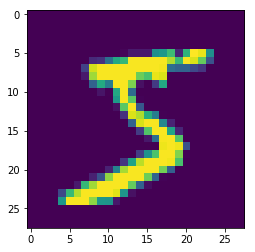

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0]);

In [5]:
import tensorflow as tf
from keras_utils import reset_tf_session
s = reset_tf_session()

In [6]:
import keras
from keras.models import Sequential
import keras.layers as ll

model = Sequential(name="mlp")

model.add(ll.InputLayer([28, 28]))

model.add(ll.Flatten())

# network body
l1=ll.Dense(32,name='l1')
l2=ll.Dense(128,name='l2')
l3=ll.Dense(10,name='l3',activation='softmax')

model.add(l1)
model.add(ll.Activation('relu'))
model.add(l2)
model.add(ll.Activation('relu'))
model.add(l3)

# categorical_crossentropy is crossentropy applied for one-hot-encoded vectors
model.compile("adam", "categorical_crossentropy", metrics=["accuracy"])

model.save_weights('model_04.h5')

In [7]:
#model.summary()

Bartlett et al 1703.02930:
We  prove  new  upper  and  lower  bounds  on  the  VC-dimension  of  deep  neural  networks with  the  ReLU  activation  function.   These  bounds  are  tight  for  almost  the  entire  range of parameters.  Letting **W be the number of weights** and L be the number of layers,  we prove that the VC-dimension is O ( WL log( W )), and provide examples with VC-dimension Ω( WL log( W/L )).   This  improves  both  the  previously  known  upper  bounds  and  lower bounds. ** In terms of the number U of non-linear units, we prove a tight bound Θ( WU ) on the VC-dimension.**  All of these bounds generalize to arbitrary piecewise linear activation functions, and also hold for the pseudodimensions of these function c


It is particularly interesting to consider how the VC-dimension is affected by the various
attributes  of  the  network:   the  number **W of  parameters  (i.e.,  weights  and  biases)**,  the number
** U of non-linear units (i.e., nodes)**, and the number L of layers. 

 so the number of parameters and non-linear units is respectively given by:
#weight matrices + bias vectors of each layer:
w1 = l1.get_weights()[0]
b1 = l1.get_weights()[1]
w2 = l2.get_weights()[0]
b2 = l2.get_weights()[1]


#no of parameters each layer
p1 = w1.shape[0]*w1.shape[1]+b1.shape[0]
p2 = w2.shape[0]*w2.shape[1]+b2.shape[0]

#no of non-linear units of each layer
nu1 = w1.shape[1]
nu2 = w2.shape[1]

WU=(p1+p2)*(nu1+nu2)
WU

In [8]:
from tensorflow import set_random_seed
def norm(v):
    return (v-min(v))/(max(v)-min(v))

In [9]:
def generate_data(x_train, y_train, size, labels=labels, random_labels=False, seed=False):
    
    if seed!=False:
        np.random.seed(seed)
    ids = np.random.randint(X_train.shape[0], size=size)
    #print(ids)
    if random_labels==True:
        ys = y_train.copy()
        lb = labels.copy()   
        np.random.shuffle(ys)
        np.random.shuffle(lb)
        y0 = ys[ids]
        y = np.asarray([y0[i] if np.sum(y0[i]!=y_train[ids][i]) else [yi for yi in labels if np.sum(yi != y0[i])][0] for i in range(size)])
        #print('assert',np.mean([np.sum((y==y_train[ids])[i,:])== 10 for i in range(size)]))
        return X_train[ids,:],y
    else:
        return X_train[ids,:],y_train[ids]
    
#generate_data(X_train,y_train,5,random_labels=True,seed=True)[1]

In [10]:
%matplotlib inline

def red_data(x_train, y_train, size, labels=labels, random_labels=False,img=False, seed=False, red=0.5):
    #Ex: with red=0.6, only 40% of the data is unique, red=0
    
    if seed!=False:
        np.random.seed(seed)
    #ids and ids2 are the data indices, while the second is a fraction red of indices appearing twice
    ids = random.sample(range(1, X_train.shape[0]), size)
    ids2=ids[:round(size*(1-red))]
    #print(len(ids2))
    if red>=0 and red <=0.5:
        ids2 = ids2+ids2[:round(size*red)] #.tolist()
    elif red!=1:
        for i in range(round(1/(1-red))):
            ids2=ids2+ids2
        ids2 = ids2[:round(size)]
    else:
        print('red=', red, 'not valid')
    np.random.shuffle(ids2)
    
    if random_labels==True:
        ys = y_train.copy()
        lb = labels.copy()   
        np.random.shuffle(ys)
        np.random.shuffle(lb)
        y0 = ys[ids2]
       
        y = np.asarray([y0[i] if np.sum(y0[i]!=y_train[ids2][i]) else [yi for yi in labels if np.sum(yi != y0[i])][0] for i in range(size)])
        if img==True:
            n=4
            c=1
            fig = plt.figure()
            for i in range(int(size/n)):
                for k in range(n):
                    ax = fig.add_subplot(int(size/n),int(size/n),c)
                    #print(y[i])
                    ax.imshow(X_train[ids2,:][c-1])
                    c+=1
            
        return X_train[ids2,:], y
    
    else:
        if img==True:
            n=4
            c=1
            fig = plt.figure()
            for i in range(int(size/n)):
                for k in range(n):
                    ax = fig.add_subplot(int(size/n),int(size/n),c)
                    #print(y[i])
                    ax.imshow(X_train[ids2,:][c-1])
                    c+=1
        return X_train[ids2,:],y_train[ids2]

#red_data(X_train,y_train,8,random_labels=False,seed=True,red=0)[1]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

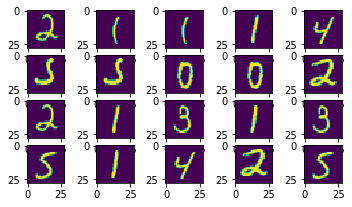

In [11]:
red_data(X_train,y_train,20,random_labels=False,img=True,seed=True,red=0.5)[1]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

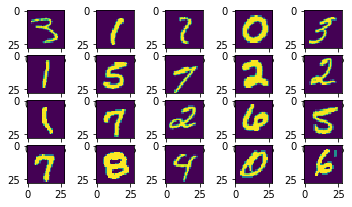

In [12]:
red_data(X_train,y_train,20,random_labels=True,img=True,seed=True,red=0)[1]

In [13]:
class MEarlyStopping(keras.callbacks.Callback):
    
    def __init__(self, monitor='loss', monitor_value=0.0,period=0):
        super(MEarlyStopping, self).__init__()
        self.monitor = monitor
        self.monitor_value = monitor_value
        self.period=period
        self.err = monitor_value/10

    def on_train_begin(self, logs={}):
        self.epochs = []


    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        self.period += 1
        
        if current is None:
            warnings.warn('Can save model only with %s available, '
                          'skipping.' % (self.monitor), RuntimeWarning)
        
        
        elif logs.get(self.monitor) <= self.monitor_value +self.err and logs.get(self.monitor) >= self.monitor_value -self.err:
            
            self.epochs.append(self.period)
            #self.epochs.append(epoch) #also correct
            self.model.stop_training = True
           # print('Epoch %05d: early stopping' % (self.period+1))

In [14]:
class MModelCheckpoint(keras.callbacks.Callback):
    """see https://github.com/keras-team/keras/blob/master/keras/callbacks.py#L360
    """

    def __init__(self, monitor='acc', monitor_value=0.0,period=0):
        super(MModelCheckpoint, self).__init__()
        self.monitor = monitor
        self.monitor_value = monitor_value
        self.period=period
                
    def on_train_begin(self, logs={}):
        self.losses = []
        self.accuracies = []
        self.vaccuracies = []
        self.vlosses = []
        self.norms1 = []
        self.norms2 = []
        self.norms3 = []
        self.epochs = []

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        self.period += 1
        
        if current is None:
            warnings.warn('Can save model only with %s available, '
                          'skipping.' % (self.monitor), RuntimeWarning)

        elif logs.get(self.monitor) == self.monitor_value:
            
            self.losses.append(logs.get('loss'))
            self.accuracies.append(logs.get('acc'))
            self.vaccuracies.append(logs.get('val_acc'))
            self.vlosses.append(logs.get('val_loss'))
            self.norms1.append(np.linalg.norm(l1.get_weights()[0],'fro'))
            self.norms2.append(np.linalg.norm(l2.get_weights()[0],'fro'))
            self.norms3.append(np.linalg.norm(l3.get_weights()[0],'fro'))
            self.epochs.append(self.period)

In [15]:
def traincb(x_train,y_train,x_val,y_val,total_size=1000,batch_size=16,labels=labels,tol=12,size=50,prt_rt=100,random_labels=False,seed=False,red=0.):
    
    if seed!=False:
        np.random.seed(4)
        #set_random_seed(42)
    
    l2_norms,l2_norms1 = [],[]
    accs, accs1 = [], [] 
    vaccs, vaccs1 = [], [] 
    sizes=[]
    epochs, epochs1 = [], []
    losses, losses1 = [], []
    val_losses, val_losses1 = [], []
    updates, updates1 = [], []

    
    X_t,y_t = red_data(x_train, y_train, size=total_size, labels=labels, random_labels=random_labels, seed=seed,red=red)
    

    size2=size
    i=int(X_t.shape[0]/size2)-1
    n_epochs=5000
    while i >=0 and i*size<=total_size and (i+1)*size>=16: 
        sizes.append(y_t[:(i+1)*size].shape[0])
        model.load_weights('model_04.h5')
        
        cb = MModelCheckpoint(monitor='acc', monitor_value=1.0)
        es = MEarlyStopping(monitor='loss',monitor_value=0.000001)
        #es = EarlyStopping(monitor='loss',baseline=0.0,mode='min',verbose=1)
        training = model.fit(X_t[:(i+1)*size], y_t[:(i+1)*size],batch_size, epochs=n_epochs,verbose=0,
                             validation_data=(x_val[:(i+1)*int(size/5)], y_val[:(i+1)*int(size/5)]),
                             callbacks=[cb,es]);
          
        if es.epochs ==[]:
            print('not enough epochs for target loss value')
            
        if cb.epochs != [] and es.epochs != []:
            print(es.epochs[0],cb.epochs[-1])
            
        if cb.epochs != []:

            accs1.append(cb.accuracies[0])

            F11 = cb.norms1[0]
            F21 = cb.norms2[0]
            F31 = cb.norms3[0]

            l2_norm1=4*F11**2*F21**2*F31**2
            l2_norms1.append(l2_norm1)
            epochs1.append(cb.epochs[0])
            updates1.append(cb.epochs[0]*y_t[:(i+1)*size].shape[0]/batch_size)
            losses1.append(cb.losses[0])
            val_losses1.append(cb.vlosses[0])
            vaccs1.append(cb.vaccuracies[0])

        F1 =np.linalg.norm(l1.get_weights()[0],'fro')
        F2 =np.linalg.norm(l2.get_weights()[0],'fro')
        F3 =np.linalg.norm(l3.get_weights()[0],'fro')
        #print(F11[-1],F1) check!
        
        l2_norm=4*F1**2*F2**2*F3**2
        
        l2_norms.append(l2_norm)
        losses.append(training.history['loss'][-1])
        #print('vl',training.history['val_loss'][-1])
        val_losses.append(training.history['val_loss'][-1])
        accs.append(training.history['acc'][-1])
        vaccs.append(training.history['val_acc'][-1])
        epochs.append(cb.epochs[-1]) # equivalent to es.epochs[0]
        updates.append(epochs[-1]*y_t[:(i+1)*size].shape[0]/batch_size)
        #print((i+1)*size,'>=16--',i*size,'<=',total_size,'--i=',i)
        if (i+1)*size%prt_rt==0:
            print('size:',y_t[:(i+1)*size].shape[0], '  --  loss:',np.round(training.history['loss'][-1],6), 'after',epochs[-1],'epochs')
        i=i-1
       # if size >= 32 and i <= int(X_t.shape[0]/(2*size2)):
        #    size=size-8
        #print((i+1)*size,'>=16--',i*size,'<=',total_size,'--i=',i)
        #print(np.asarray(losses))
        #print(np.asarray(val_losses))
        #print('done')
    
    a_, va_, l_, vl_,l2_, e_, u_ = np.asarray(accs),np.asarray(vaccs),np.asarray(losses),np.asarray(val_losses), np.asarray(l2_norms), np.asarray(epochs),np.asarray(updates)
    a_1, va_1, l_1, vl_1, l2_1, e_1, u_1=np.asarray(accs1),np.asarray(vaccs1), np.asarray(losses1), np.asarray(val_losses1), np.asarray(l2_norms1), np.asarray(epochs1),np.asarray(updates1)

    c=1
    fig = plt.figure()
    for i in range(4):
        for k in range(2):
            ax = fig.add_subplot(4,4,c)
            #print(y[i])
            ax.imshow(X_train[c-1])
            c+=1

    return np.asarray(sizes), a_, va_, l_, vl_,l2_, e_, u_, a_1, va_1, l_1, vl_1, l2_1, e_1, u_1

- info content weights in both cases
- bigger weights drive loss to lower values... but although in the random case weights are bigger the loss is of same magnitude as in the normal case
- can i quantify anything by varying the % of random labels?
- redundancy in data set drives learning with good generalization
- redundancy prevent excessive growth of weights during loss minimization
- repeated examples or some data processing which lowers info content could test that

# Include val loss
we see already a (anti)correlation between weights norms and loss and weigths norms and n.epochs
now let's see how the validation loss

753 753
size: 1792   --  loss: 1e-06 after 753 epochs
886 886
size: 1536   --  loss: 1e-06 after 886 epochs
2570 2570
size: 1280   --  loss: 1e-06 after 2570 epochs
379 379
size: 1024   --  loss: 1e-06 after 379 epochs
510 510
size: 768   --  loss: 1e-06 after 510 epochs
518 518
size: 512   --  loss: 1e-06 after 518 epochs
776 776
size: 256   --  loss: 1e-06 after 776 epochs
526 526
size: 3584   --  loss: 1e-06 after 526 epochs
1431 1431
size: 3072   --  loss: 1e-06 after 1431 epochs
1617 1617
size: 2560   --  loss: 1e-06 after 1617 epochs
1060 1060
size: 2048   --  loss: 1e-06 after 1060 epochs
796 796
size: 1536   --  loss: 1e-06 after 796 epochs
411 411
size: 1024   --  loss: 1e-06 after 411 epochs
489 489
size: 512   --  loss: 1e-06 after 489 epochs
355 355
size: 7168   --  loss: 1e-06 after 355 epochs
593 593
size: 6144   --  loss: 1e-06 after 593 epochs
927 927
size: 5120   --  loss: 1e-06 after 927 epochs
3314 3314
size: 4096   --  loss: 1e-06 after 3314 epochs
1039 1039
size: 3

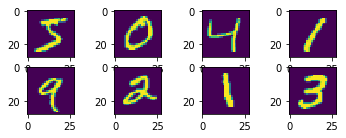

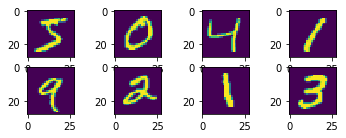

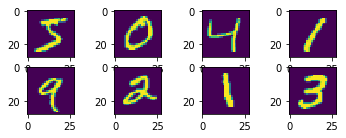

In [16]:
ts=(256)*7
sz=256
rl=True
sd=7

tr_r = traincb(X_train,y_train,X_val,y_val,total_size=ts,size=sz,prt_rt=1,random_labels=rl,seed=sd,red=0)
s_r, a_r, va_r, l_r, vl_r, l2_r, e_r,u_r, a_r1, va_r1, l_r1, vl_r1, l2_r1, e_r1, u_r1 =tr_r

ts=(256)*14
sz=256*2

tr_r05 = traincb(X_train,y_train,X_val,y_val,total_size=ts,size=sz,prt_rt=1,random_labels=rl,seed=sd,red=0.5)
s05_r, a05_r, va05_r, l05_r, vl05_r, l205_r, e05_r, u05_r, a05_r1, va05_r1, l05_r1, vl05_r1, l205_r1, e05_r1, u05_r1 =tr_r05

ts=(256)*28
sz=256*4

tr_r025 = traincb(X_train,y_train,X_val,y_val,total_size=ts,size=sz,prt_rt=8,random_labels=rl,seed=sd,red=0.75)
s025_r, a025_r, va025_r, l025_r, vl025_r, l2025_r, e025_r, u025_r, a025_r1, va025_r1, l025_r1, vl025_r1, l2025_r1, e025_r1, u025_r1 =tr_r025

126 126
size: 1792   --  loss: 1e-06 after 126 epochs
133 133
size: 1536   --  loss: 1e-06 after 133 epochs
160 160
size: 1280   --  loss: 1e-06 after 160 epochs
195 195
size: 1024   --  loss: 1e-06 after 195 epochs
243 243
size: 768   --  loss: 1e-06 after 243 epochs
327 327
size: 512   --  loss: 1e-06 after 327 epochs
580 580
size: 256   --  loss: 1e-06 after 580 epochs
65 65
size: 3584   --  loss: 1e-06 after 65 epochs
74 74
size: 3072   --  loss: 1e-06 after 74 epochs
89 89
size: 2560   --  loss: 1e-06 after 89 epochs
106 106
size: 2048   --  loss: 1e-06 after 106 epochs
138 138
size: 1536   --  loss: 1e-06 after 138 epochs
195 195
size: 1024   --  loss: 1e-06 after 195 epochs
327 327
size: 512   --  loss: 1e-06 after 327 epochs
32 32
size: 7168   --  loss: 1e-06 after 32 epochs
37 37
size: 6144   --  loss: 1e-06 after 37 epochs
44 44
size: 5120   --  loss: 1e-06 after 44 epochs
56 56
size: 4096   --  loss: 1e-06 after 56 epochs
71 71
size: 3072   --  loss: 1e-06 after 71 epochs
10

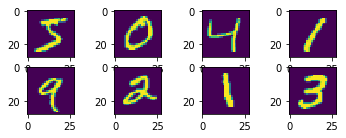

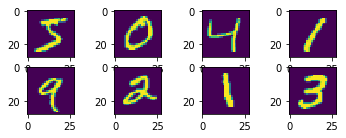

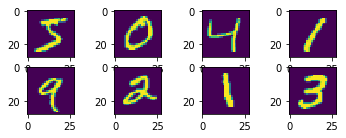

In [17]:
ts=(256)*7
sz=256
rl=False
sd=7

tr_ = traincb(X_train,y_train,X_val,y_val,total_size=ts,size=sz,prt_rt=1,random_labels=rl,seed=sd,red=0)
s_, a_, va_, l_, vl_,l2_, e_, u_, a_1, va_1, l_1, vl_1, l2_1, e_1, u_1= tr_

ts=(256)*14
sz=256*2

tr_05 = traincb(X_train,y_train,X_val,y_val,total_size=ts,size=sz,prt_rt=1,random_labels=rl,seed=sd,red=0.5)
s05_, a05_, va05_, l05_, vl05_,l205_, e05_, u05_, a05_1, va05_1, l05_1, vl05_1, l205_1, e05_1, u05_1= tr_05

ts=(256)*28
sz=256*4

tr_025 = traincb(X_train,y_train,X_val,y_val,total_size=ts,size=sz,prt_rt=1,random_labels=rl,seed=sd,red=0.75)
s025_, a025_, va025_, l025_, vl025_,l2025_, e025_, u025_, a025_1, va025_1, l025_1, vl025_1, l2025_1, e025_1, u025_1= tr_025

In [156]:
#rescale validation loss and val error wrt number of iterations (literatue: more training=better generalization)
#compare performance of nn with different sizes with fixed number of epochs/iterations 
#(the literatures says bigger networks generalize better)

         ACC-1  RANDOM:   UNIQUE VS REDUNDANT


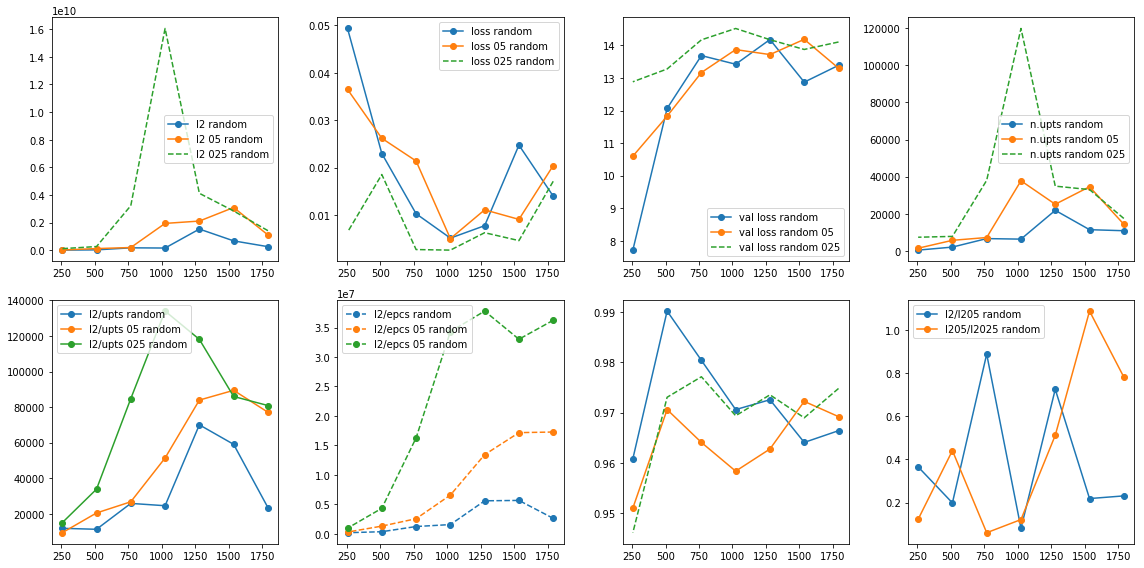

In [26]:
print('         ACC-1  RANDOM:   UNIQUE VS REDUNDANT')
plt.title('')
f=1 #0**(-0.)
f2=1 #0**-0
n0=0
nn=len(e_r1)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

plt.subplot(2,4,1)
plt.plot(s_r[n0:nn],l2_r1[n0:nn]*f,'o-',label='l2 random')
plt.plot(s_r[n0:nn],l205_r1[n0:nn]*f,'o-',label='l2 05 random')
plt.plot(s_r[n0:nn],l2025_r1[n0:nn]*f,'--',label='l2 025 random')
plt.legend()
plt.subplot(2,4,2)
plt.plot(s_r[n0:nn],l_r1[n0:nn],'o-',label='loss random')
plt.plot(s_r[n0:nn],l05_r1[n0:nn],'o-',label='loss 05 random')
plt.plot(s_r[n0:nn],l025_r1[n0:nn],'--',label='loss 025 random')
plt.legend()
plt.subplot(2,4,3)
plt.plot(s_r[n0:nn],vl_r1[n0:nn]*f2,'o-',label='val loss random')
plt.plot(s_r[n0:nn],vl05_r1[n0:nn]*f2,'o-',label='val loss random 05')
plt.plot(s_r[n0:nn],vl025_r1[n0:nn]*f2,'--',label='val loss random 025')
plt.legend()
plt.subplot(2,4,4)
plt.plot(s_r[n0:nn],u_r1[n0:nn],'o-',label='n.upts random')
plt.plot(s_r[n0:nn],u05_r1[n0:nn],'o-',label='n.upts random 05')
plt.plot(s_r[n0:nn],u025_r1[n0:nn],'--',label='n.upts random 025')
plt.legend()
plt.subplot(2,4,5)
plt.plot(s_r[n0:nn],l2_r1[n0:nn]/u_r1[n0:nn],'o-',label='l2/upts random')
plt.plot(s_r[n0:nn],l205_r1[n0:nn]/u05_r1[n0:nn],'o-',label='l2/upts 05 random')
plt.plot(s_r[n0:nn],l2025_r1[n0:nn]/u025_r1[n0:nn],'o-',label='l2/upts 025 random')
plt.legend()
plt.subplot(2,4,6)
plt.plot(s_r[n0:nn],l2_r1[n0:nn]/e_r1[n0:nn],'o--',label='l2/epcs random')
plt.plot(s_r[n0:nn],l205_r1[n0:nn]/e05_r1[n0:nn],'o--',label='l2/epcs 05 random')
plt.plot(s_r[n0:nn],l2025_r1[n0:nn]/e025_r1[n0:nn],'o--',label='l2/epcs 05 random')
plt.legend()
plt.subplot(2,4,7)
plt.plot(s_r[n0:nn],1-va_r1[n0:nn],'o-',label='val error random')
plt.plot(s_r[n0:nn],1-va05_r1[n0:nn],'o-',label='val error random 05')
plt.plot(s_r[n0:nn],1-va025_r1[n0:nn],'--',label='val error random 025')
plt.subplot(2,4,8)
plt.plot(s_r[n0:nn],l2_r1[n0:nn]/l205_r1[n0:nn],'o-',label='l2/l205 random')
plt.plot(s_r[n0:nn],l205_r1[n0:nn]/l2025_r1[n0:nn],'o-',label='l205/l2025 random')
#plt.plot(s_r[n0:nn],l2025_r1[n0:nn]*f,'--',label='l2 025 random')
plt.legend()

plt.tight_layout()
plt.show()
#plt.savefig('testplot.png')

         "loss<=10**-5"  RANDOM:   UNIQUE VS REDUNDANT


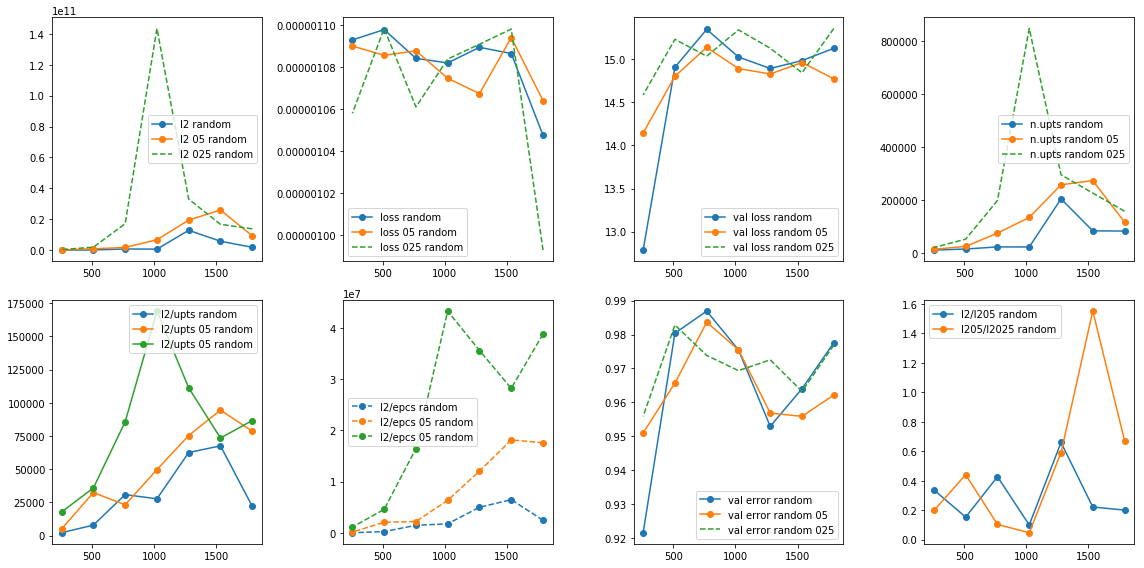

In [20]:
print('         "loss<=10**-5"  RANDOM:   UNIQUE VS REDUNDANT')
plt.title('')
f=1 #0**(-0.)
f2=1 #0**-0
n0=0
nn=len(e_r)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
plt.subplot(2,4,1)
plt.plot(s_r[n0:nn],l2_r[n0:nn]*f,'o-',label='l2 random')
plt.plot(s_r[n0:nn],l205_r[n0:nn]*f,'o-',label='l2 05 random')
plt.plot(s_r[n0:nn],l2025_r[n0:nn]*f,'--',label='l2 025 random')
plt.legend()
plt.subplot(2,4,2)
plt.plot(s_r[n0:nn],l_r[n0:nn],'o-',label='loss random')
plt.plot(s_r[n0:nn],l05_r[n0:nn],'o-',label='loss 05 random')
plt.plot(s_r[n0:nn],l025_r[n0:nn],'--',label='loss 025 random')
plt.legend()
plt.subplot(2,4,3)
plt.plot(s_r[n0:nn],vl_r[n0:nn]*f2,'o-',label='val loss random')
plt.plot(s_r[n0:nn],vl05_r[n0:nn]*f2,'o-',label='val loss random 05')
plt.plot(s_r[n0:nn],vl025_r[n0:nn]*f2,'--',label='val loss random 025')
plt.legend()
plt.subplot(2,4,4)
plt.plot(s_r[n0:nn],u_r[n0:nn],'o-',label='n.upts random')
plt.plot(s_r[n0:nn],u05_r[n0:nn],'o-',label='n.upts random 05')
plt.plot(s_r[n0:nn],u025_r[n0:nn],'--',label='n.upts random 025')
plt.legend()
plt.subplot(2,4,5)
plt.plot(s_r[n0:nn],l2_r[n0:nn]/u_r[n0:nn],'o-',label='l2/upts random')
plt.plot(s_r[n0:nn],l205_r[n0:nn]/u05_r[n0:nn],'o-',label='l2/upts 05 random')
plt.plot(s_r[n0:nn],l2025_r[n0:nn]/u025_r[n0:nn],'o-',label='l2/upts 05 random')
plt.legend()
plt.subplot(2,4,6)
plt.plot(s_r[n0:nn],l2_r[n0:nn]/e_r[n0:nn],'o--',label='l2/epcs random')
plt.plot(s_r[n0:nn],l205_r[n0:nn]/e05_r[n0:nn],'o--',label='l2/epcs 05 random')
plt.plot(s_r[n0:nn],l2025_r[n0:nn]/e025_r[n0:nn],'o--',label='l2/epcs 05 random')
plt.legend()
plt.subplot(2,4,7)
plt.plot(s_r[n0:nn],1-va_r[n0:nn],'o-',label='val error random')
plt.plot(s_r[n0:nn],1-va05_r[n0:nn],'o-',label='val error random 05')
plt.plot(s_r[n0:nn],1-va025_r[n0:nn],'--',label='val error random 025')
plt.legend()
plt.subplot(2,4,8)
plt.plot(s_r[n0:nn],l2_r[n0:nn]/l205_r[n0:nn],'o-',label='l2/l205 random')
plt.plot(s_r[n0:nn],l205_r[n0:nn]/l2025_r[n0:nn],'o-',label='l205/l2025 random')

plt.legend()
plt.tight_layout()
plt.show()
#plt.savefig('testplot.png')

         ACC-1  NORMAL:   UNIQUE VS REDUNDANT


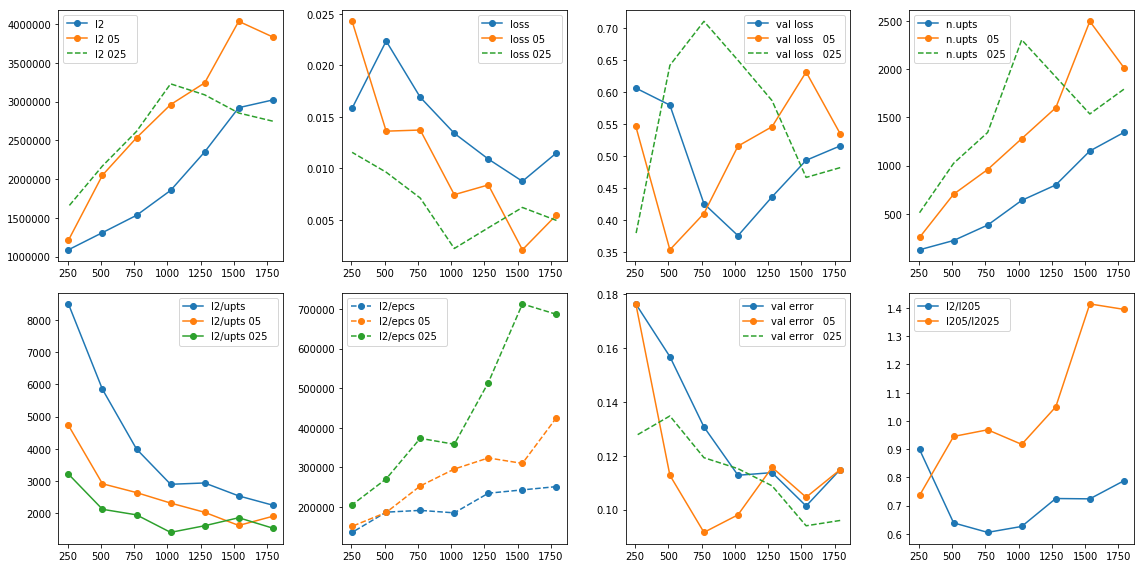

In [21]:
print('         ACC-1  NORMAL:   UNIQUE VS REDUNDANT')
plt.title('')
f=1 #0**(-0.)
f2=1 #0**-0
n0=0
nn=len(e_1)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

plt.subplot(2,4,1)
plt.plot(s_[n0:nn],l2_1[n0:nn]*f,'o-',label='l2  ')
plt.plot(s_[n0:nn],l205_1[n0:nn]*f,'o-',label='l2 05  ')
plt.plot(s_[n0:nn],l2025_1[n0:nn]*f,'--',label='l2 025  ')
plt.legend()
plt.subplot(2,4,2)
plt.plot(s_[n0:nn],l_1[n0:nn],'o-',label='loss  ')
plt.plot(s_[n0:nn],l05_1[n0:nn],'o-',label='loss 05  ')
plt.plot(s_[n0:nn],l025_1[n0:nn],'--',label='loss 025  ')
plt.legend()
plt.subplot(2,4,3)
plt.plot(s_[n0:nn],vl_1[n0:nn]*f2,'o-',label='val loss  ')
plt.plot(s_[n0:nn],vl05_1[n0:nn]*f2,'o-',label='val loss   05')
plt.plot(s_[n0:nn],vl025_1[n0:nn]*f2,'--',label='val loss   025')
plt.legend()
plt.subplot(2,4,4)
plt.plot(s_[n0:nn],u_1[n0:nn],'o-',label='n.upts  ')
plt.plot(s_[n0:nn],u05_1[n0:nn],'o-',label='n.upts   05')
plt.plot(s_[n0:nn],u025_1[n0:nn],'--',label='n.upts   025')
plt.legend()
plt.subplot(2,4,5)
plt.plot(s_[n0:nn],l2_1[n0:nn]/u_1[n0:nn],'o-',label='l2/upts  ')
plt.plot(s_[n0:nn],l205_1[n0:nn]/u05_1[n0:nn],'o-',label='l2/upts 05  ')
plt.plot(s_[n0:nn],l2025_1[n0:nn]/u025_1[n0:nn],'o-',label='l2/upts 025  ')
plt.legend()
plt.subplot(2,4,6)
plt.plot(s_[n0:nn],l2_1[n0:nn]/e_1[n0:nn],'o--',label='l2/epcs  ')
plt.plot(s_[n0:nn],l205_1[n0:nn]/e05_1[n0:nn],'o--',label='l2/epcs 05  ')
plt.plot(s_[n0:nn],l2025_1[n0:nn]/e025_1[n0:nn],'o--',label='l2/epcs 025  ')
plt.legend()
plt.subplot(2,4,7)
plt.plot(s_[n0:nn],1-va_1[n0:nn],'o-',label='val error  ')
plt.plot(s_[n0:nn],1-va05_1[n0:nn],'o-',label='val error   05')
plt.plot(s_[n0:nn],1-va025_1[n0:nn],'--',label='val error   025')
plt.legend()
plt.subplot(2,4,8)
plt.plot(s_[n0:nn],l2_1[n0:nn]/l205_1[n0:nn],'o-',label='l2/l205  ')
plt.plot(s_[n0:nn],l205_1[n0:nn]/l2025_1[n0:nn],'o-',label='l205/l2025  ')
plt.legend()
plt.tight_layout()
plt.show()

         loss <=10**-5  NORMAL:   UNIQUE VS REDUNDANT


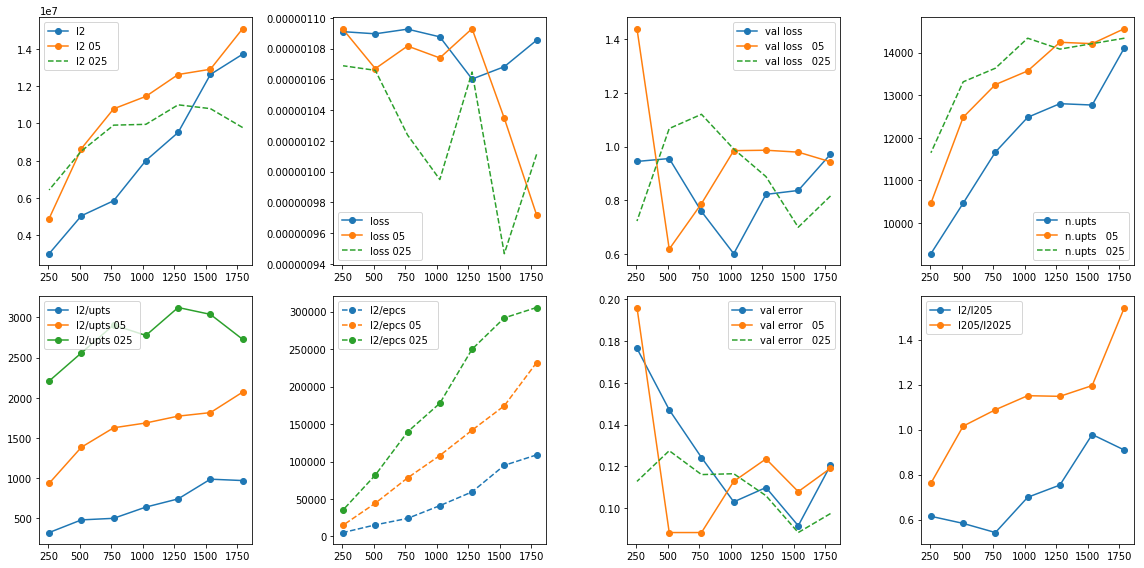

In [41]:
print('         loss <=10**-5  NORMAL:   UNIQUE VS REDUNDANT')
plt.title('')
f=1 #0**(-0.)
f2=1 #0**-0
n0=0
nn=len(e_)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

plt.subplot(2,4,1)
plt.plot(s_[n0:nn],l2_[n0:nn]*f,'o-',label='l2  ')
plt.plot(s_[n0:nn],l205_[n0:nn]*f,'o-',label='l2 05  ')
plt.plot(s_[n0:nn],l2025_[n0:nn]*f,'--',label='l2 025  ')
plt.legend()
plt.subplot(2,4,2)
plt.plot(s_[n0:nn],l_[n0:nn],'o-',label='loss  ')
plt.plot(s_[n0:nn],l05_[n0:nn],'o-',label='loss 05  ')
plt.plot(s_[n0:nn],l025_[n0:nn],'--',label='loss 025  ')
plt.legend()
plt.subplot(2,4,3)
plt.plot(s_[n0:nn],vl_[n0:nn]*f2,'o-',label='val loss  ')
plt.plot(s_[n0:nn],vl05_[n0:nn]*f2,'o-',label='val loss   05')
plt.plot(s_[n0:nn],vl025_[n0:nn]*f2,'--',label='val loss   025')
plt.legend()
plt.subplot(2,4,4)
plt.plot(s_[n0:nn],u_[n0:nn],'o-',label='n.upts  ')
plt.plot(s_[n0:nn],u05_[n0:nn],'o-',label='n.upts   05')
plt.plot(s_[n0:nn],u025_[n0:nn],'--',label='n.upts   025')
plt.legend()
plt.subplot(2,4,5)
plt.plot(s_[n0:nn],l2_[n0:nn]/u_[n0:nn],'o-',label='l2/upts  ')
plt.plot(s_[n0:nn],2*l205_[n0:nn]/u05_[n0:nn],'o-',label='l2/upts 05 ')
plt.plot(s_[n0:nn],4*l2025_[n0:nn]/u025_[n0:nn],'o-',label='l2/upts 025 ')
plt.legend()
plt.subplot(2,4,6)
plt.plot(s_[n0:nn],l2_[n0:nn]/e_[n0:nn],'o--',label='l2/epcs  ')
plt.plot(s_[n0:nn],l205_[n0:nn]/e05_[n0:nn],'o--',label='l2/epcs 05  ')
plt.plot(s_[n0:nn],l2025_[n0:nn]/e025_[n0:nn],'o--',label='l2/epcs 025  ')
plt.legend()
plt.subplot(2,4,7)
plt.plot(s_[n0:nn],1-va_[n0:nn],'o-',label='val error  ')
plt.plot(s_[n0:nn],1-va05_[n0:nn],'o-',label='val error   05')
plt.plot(s_[n0:nn],1-va025_[n0:nn],'--',label='val error   025')
plt.legend()
plt.subplot(2,4,8)
plt.plot(s_[n0:nn],l2_[n0:nn]/l205_[n0:nn],'o-',label='l2/l205  ')
plt.plot(s_[n0:nn],l205_[n0:nn]/l2025_[n0:nn],'o-',label='l205/l2025  ')
plt.legend()
plt.tight_layout()
plt.show()

         0 loss vs ACC-1  NORMAL:   UNIQUE VS REDUNDANT


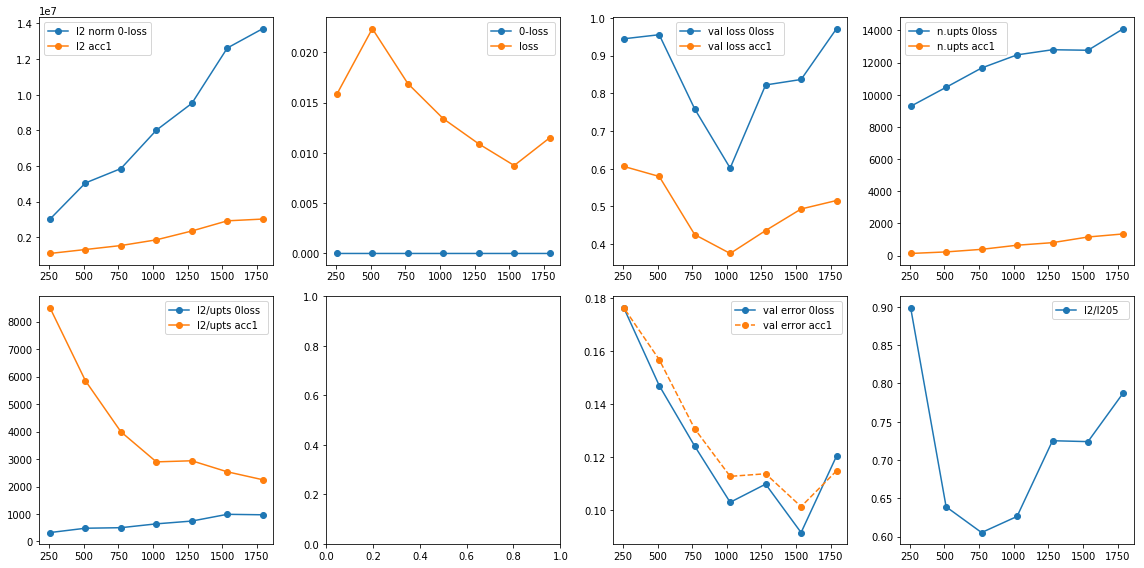

In [27]:
print('         0 loss vs ACC-1  NORMAL:   UNIQUE VS REDUNDANT')
plt.title('')
f=1 #0**(-0.)
f2=1 #0**-0
n0=0
nn=len(e_1)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

plt.subplot(2,4,1)
plt.plot(s_[n0:nn],l2_[n0:nn],'o-',label='l2 norm 0-loss')
plt.plot(s_[n0:nn],l2_1[n0:nn],'o-',label='l2 acc1  ')
#plt.plot(s_[n0:nn],l2_[n0:nn]-l2_1[n0:nn],'--',label='l2 0-loss -l2 acc1  ')
#plt.plot(s_[n0:nn],l2025_1[n0:nn]*f,'--',label='l2 025  ')
plt.legend()
plt.subplot(2,4,2)
plt.plot(s_[n0:nn],l_[n0:nn],'o-',label='0-loss ')
plt.plot(s_[n0:nn],l_1[n0:nn],'o-',label='loss  ')
#plt.plot(s_[n0:nn],l_[n0:nn]-l_1[n0:nn],'o-',label='0-loss -acc1 loss  ')
#plt.plot(s_[n0:nn],l025_1[n0:nn],'--',label='loss 025  ')
plt.legend()
plt.subplot(2,4,3)
plt.plot(s_[n0:nn],vl_[n0:nn],'o-',label='val loss 0loss  ')
plt.plot(s_[n0:nn],vl_1[n0:nn],'o-',label='val loss acc1 ')
#plt.plot(s_[n0:nn],vl_[n0:nn]-vl_1[n0:nn],'o-',label='val loss 0loss-acc1  ')
#plt.plot(s_[n0:nn],vl05_[n0:nn]-vl05_1[n0:nn],'o-',label='val loss   05')
plt.legend()
plt.subplot(2,4,4)
plt.plot(s_[n0:nn],u_[n0:nn],'o-',label='n.upts 0loss  ')
plt.plot(s_[n0:nn],u_1[n0:nn],'o-',label='n.upts acc1 ')
#plt.plot(s_[n0:nn],u_[n0:nn]-u_1[n0:nn],'o-',label='n.upts 0loss-acc1 ')
#plt.plot(s_[n0:nn],u025_1[n0:nn],'--',label='n.upts   025')
plt.legend()
plt.subplot(2,4,5)
plt.plot(s_[n0:nn],l2_[n0:nn]/u_[n0:nn],'o-',label='l2/upts 0loss ')
plt.plot(s_[n0:nn],l2_1[n0:nn]/u_1[n0:nn],'o-',label='l2/upts acc1  ')
#plt.plot(s_[n0:nn],l2_[n0:nn]/u_[n0:nn]-l2_1[n0:nn]/u_1[n0:nn],'o-',label='l2/upts 0loss-acc1 ')
plt.legend()
plt.subplot(2,4,6)
#plt.plot(s_[n0:nn],l2_1[n0:nn]/e_1[n0:nn],'o--',label='l2/epcs  ')
#plt.plot(s_[n0:nn],l205_1[n0:nn]/e05_1[n0:nn],'o--',label='l2/epcs 05  ')
#plt.plot(s_[n0:nn],e025_1[n0:nn],'--',label='n.epochs   025')
#plt.legend()
plt.subplot(2,4,7)
plt.plot(s_[n0:nn],1-va_[n0:nn],'o-',label='val error 0loss ')
plt.plot(s_[n0:nn],1-va_1[n0:nn],'o--',label='val error acc1  ')
#plt.plot(s_[n0:nn],1-va_[n0:nn]-1+va_1[n0:nn],'o-',label='val error 0loss-acc1 ')
plt.legend()
plt.subplot(2,4,8)
plt.plot(s_[n0:nn],l2_1[n0:nn]/l205_1[n0:nn],'o-',label='l2/l205  ')
#plt.plot(s_[n0:nn],l205_1[n0:nn]*f,'o-',label='l2 05  ')
plt.legend()
plt.tight_layout()
plt.show()

?When the capacity is much greater than the necessary p>>n, then the number of updates necessary to get to acc=1 is determined by the size
what determines the transition: n_upts0.5 != n.upts??
The validation error is bigger because we have used a less varied training set, as expected

                 acc->1:   NORMAL VS RANDOM
we notice as stark correlation btw n. of updates (epochs) and the  L2 norm for random labels


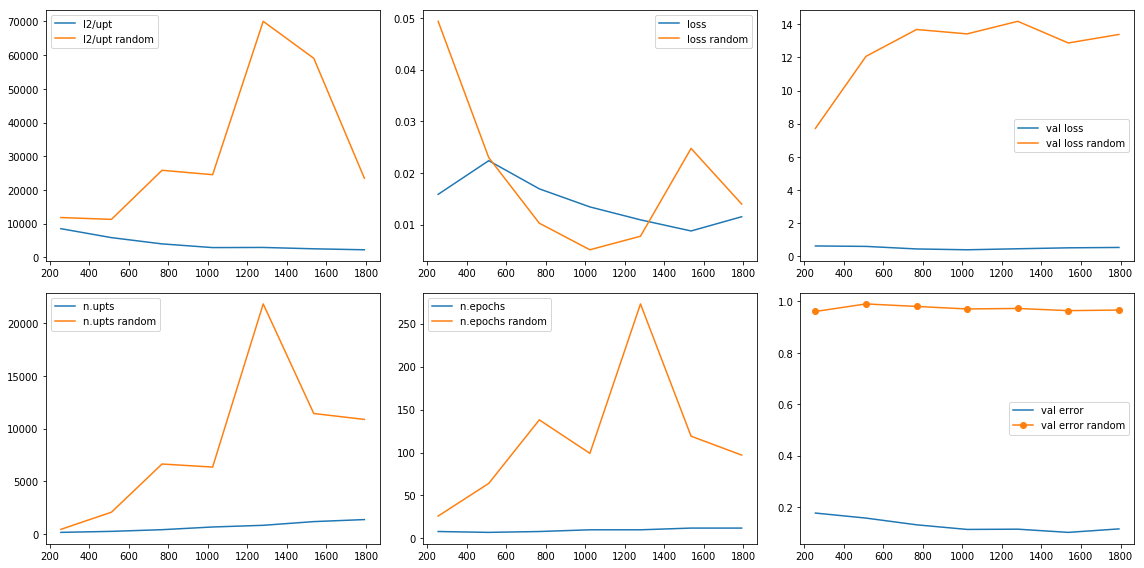

In [35]:
print('                 acc->1:   NORMAL VS RANDOM')
print('we notice as stark correlation btw n. of updates (epochs) and the  L2 norm for random labels')
plt.title('')
f=1 #0**(-0.)
f2=1 #0**-0
n0=0
nn=len(e_r1)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

plt.subplot(2,3,1)
#plt.plot(s_[n0:nn],l2_1[n0:nn]*f,'-',label='l2 ')
#plt.plot(s_r[n0:nn],l2_r1[n0:nn]*f,'-',label='l2 random')
plt.plot(s_[n0:nn],l2_1[n0:nn]/u_1[n0:nn],'-',label='l2/upt ')
plt.plot(s_r[n0:nn],l2_r1[n0:nn]/u_r1[n0:nn],'-',label='l2/upt random')
plt.legend()
plt.subplot(2,3,2)
plt.plot(s_[n0:nn],l_1[n0:nn],'-',label='loss ')
plt.plot(s_r[n0:nn],l_r1[n0:nn],'-',label='loss random')
plt.legend()
plt.subplot(2,3,3)
plt.plot(s_[n0:nn],vl_1[n0:nn]*f2,'-',label='val loss ')
plt.plot(s_r[n0:nn],vl_r1[n0:nn]*f2,'-',label='val loss random')
plt.legend()
plt.subplot(2,3,4)
plt.plot(s_[n0:nn],u_1[n0:nn],'-',label='n.upts ')
plt.plot(s_r[n0:nn],u_r1[n0:nn],'-',label='n.upts random')
plt.legend()
plt.subplot(2,3,5)
plt.plot(s_[n0:nn],e_1[n0:nn],'-',label='n.epochs ')
plt.plot(s_r[n0:nn],e_r1[n0:nn],'-',label='n.epochs random')
plt.legend()
plt.subplot(2,3,6)
plt.plot(s_[n0:nn],1-va_1[n0:nn],'-',label='val error ')
plt.plot(s_r[n0:nn],1-va_r1[n0:nn],'o-',label='val error random')
plt.legend()


plt.tight_layout()
plt.show()

- while training to get maximal accuracy, both random and normal cases get to roughly the same loss value for same dataset size
- however the number of updates needed to obtain max accuracy is much bigger for random weights and grows with data set size, moreover, it (almost) completely determines the magnitude of the L2 norm

                 acc->1:   NORMAL
for random labels we notice as stark correlation btw n. of updates (epochs) and the  L2 norm , what about normal labels?


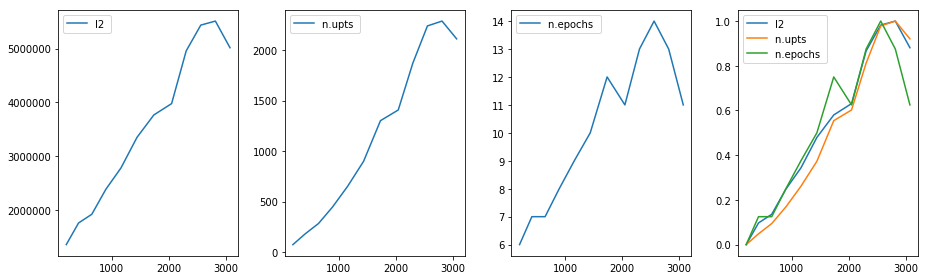

                 acc->1:   RANDOM
for random labels we notice as stark correlation btw n. of updates (epochs) and the  L2 norm , what about normal labels?


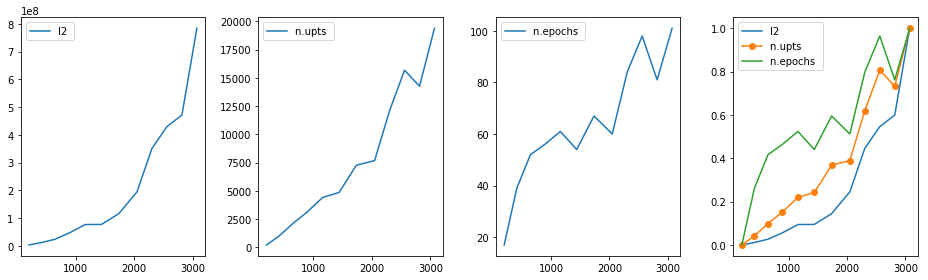

In [33]:
print('                 acc->1:   NORMAL')
print('for random labels we notice as stark correlation btw n. of updates (epochs) and the  L2 norm , what about normal labels?')
plt.title('')
f, f2 =1, 1
n0=0
nn=len(e_r1)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0], fig_size[1] =13, 4
plt.rcParams["figure.figsize"] = fig_size

plt.subplot(1,4,1)
plt.plot(s_[n0:nn],l2_1[n0:nn]*f,'-',label='l2 ')
plt.legend()
plt.subplot(1,4,2)
plt.plot(s_[n0:nn],u_1[n0:nn],'-',label='n.upts ')
plt.legend()
plt.subplot(1,4,3)
plt.plot(s_[n0:nn],e_1[n0:nn],'-',label='n.epochs ')
plt.legend()
plt.subplot(1,4,4)
plt.plot(s_[n0:nn],norm(l2_1[n0:nn]),'-',label='l2 ')
plt.plot(s_[n0:nn],norm(u_1[n0:nn]),'-',label='n.upts ')
plt.plot(s_[n0:nn],norm(e_1[n0:nn]),'-',label='n.epochs ')
plt.legend()
plt.tight_layout()
plt.show()

print('                 acc->1:   RANDOM')
print('for random labels we notice as stark correlation btw n. of updates (epochs) and the  L2 norm , what about normal labels?')
plt.title('')
plt.subplot(1,4,1)
plt.plot(s_r[n0:nn],l2_r1[n0:nn]*f,'-',label='l2 ')
plt.legend()
plt.subplot(1,4,2)
plt.plot(s_r[n0:nn],u_r1[n0:nn],'-',label='n.upts ')
plt.legend()
plt.subplot(1,4,3)
plt.plot(s_r[n0:nn],e_r1[n0:nn],'-',label='n.epochs ')
plt.legend()
plt.subplot(1,4,4)
plt.plot(s_[n0:nn],norm(l2_r1[n0:nn]),'-',label='l2 ')
plt.plot(s_[n0:nn],norm(u_r1[n0:nn]),'o-',label='n.upts ')
plt.plot(s_[n0:nn],norm(e_r1[n0:nn]),'-',label='n.epochs ')
plt.legend()

plt.tight_layout()
plt.show()

 1) For normal labeling we see a clear correlation between the n. of updates and the L2 norm. There is no great correlation between the n. of epochs and the L2 norm
 2) For random labeling we a much smaller correlation between the n. of updates and the L2 norm. 
 3) If we would like to compare how much the L2 norms differ in the normal and random cases, we can 'normalize' or rescale them wrt to the respective n. of updates. By comparing this 'rescaled' L2 norms, we can account for how much the inner structure affects the normal case. By dividing the L2 norm by the number of updates we are isolating contributions which are not due to the n. of updates
 

4) If we take the L2 norm (must we?) as correspondent to the complexity of the model, we would conclude the models is more complex in the random case. But we know that the longer we train, the higher we should expect L2 to be (and lower the loss). If we now compare the L2 norms in the case where we have performed the same number of updates for both random and normal labeling, we can conclude that the difference btw the L2 norms is due to the data.The L2 norm in the normal case won't grow as much, because of the inner structure of the data

               acc 1


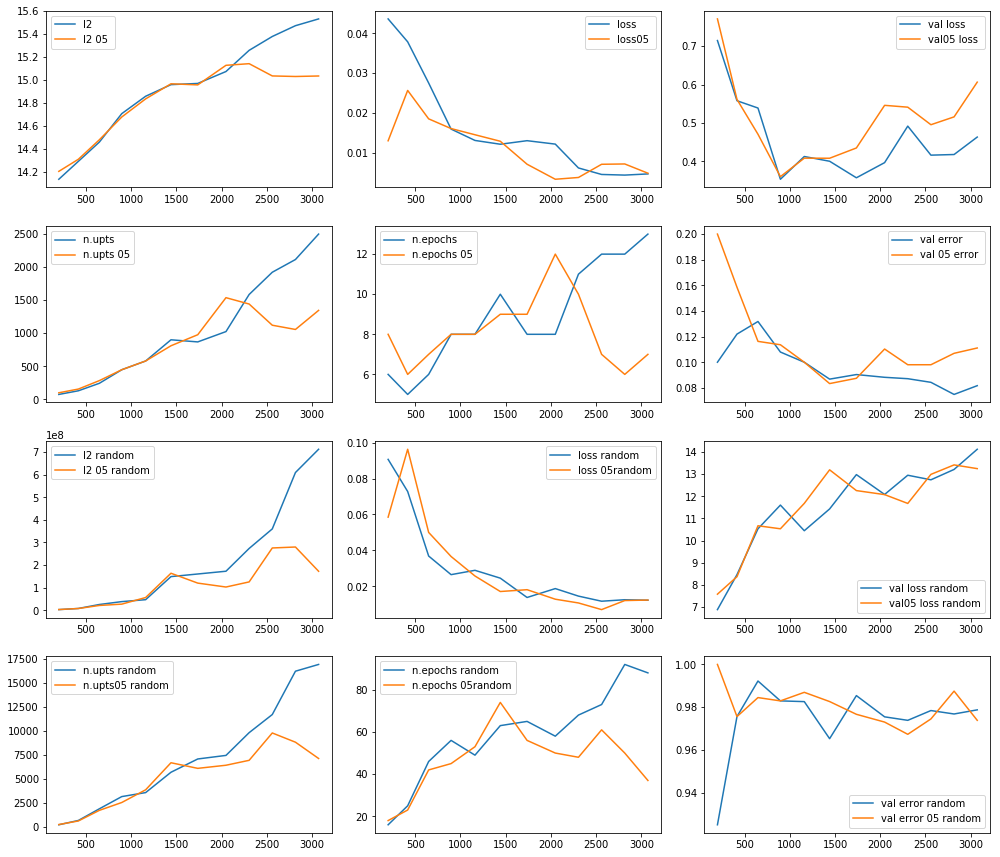

In [28]:
print('               acc 1')
plt.title('')
f=10**(-0.)
f2=10**-0
n0=0
nn=len(e_r1)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 14
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

plt.subplot(4,3,1)
plt.plot(s_[n0:nn],np.log(l2_1[n0:nn]*f),'-',label='l2 ')
plt.plot(s_[n0:nn],np.log(l205_1[n0:nn]*f),'-',label='l2 05 ')
plt.legend()
plt.subplot(4,3,2)
plt.plot(s_[n0:nn],l_1[n0:nn],'-',label='loss ')
plt.plot(s_[n0:nn],l05_1[n0:nn],'-',label='loss05 ')
plt.legend()
plt.subplot(4,3,3)
plt.plot(s_[n0:nn],vl_1[n0:nn]*f2,'-',label='val loss ')
plt.plot(s_[n0:nn],vl05_1[n0:nn]*f2,'-',label='val05 loss ')
plt.legend()
plt.subplot(4,3,4)
plt.plot(s_[n0:nn],u_1[n0:nn],'-',label='n.upts ')
plt.plot(s_[n0:nn],u05_1[n0:nn],'-',label='n.upts 05')
plt.legend()
plt.subplot(4,3,5)
plt.plot(s_[n0:nn],e_1[n0:nn],'-',label='n.epochs ')
plt.plot(s_[n0:nn],e05_1[n0:nn],'-',label='n.epochs 05')
plt.legend()
plt.subplot(4,3,6)
plt.plot(s_[n0:nn],1-va_1[n0:nn],'-',label='val error ')
plt.plot(s_[n0:nn],1-va05_1[n0:nn],'-',label='val 05 error ')
plt.legend()
plt.subplot(4,3,7)
plt.plot(s_r[n0:nn],l2_r1[n0:nn]*f,'-',label='l2 random')
plt.plot(s_r[n0:nn],l205_r1[n0:nn]*f,'-',label='l2 05 random')
plt.legend()
plt.subplot(4,3,8)
plt.plot(s_r[n0:nn],l_r1[n0:nn],'-',label='loss random')
plt.plot(s_r[n0:nn],l05_r1[n0:nn],'-',label='loss 05random')
plt.legend()
plt.subplot(4,3,9)
plt.plot(s_r[n0:nn],vl_r1[n0:nn]*f2,'-',label='val loss random')
plt.plot(s_r[n0:nn],vl05_r1[n0:nn]*f2,'-',label='val05 loss random')
plt.legend()
plt.subplot(4,3,10)
plt.plot(s_r[n0:nn],u_r1[n0:nn],'-',label='n.upts random')
plt.plot(s_r[n0:nn],u05_r1[n0:nn],'-',label='n.upts05 random')
plt.legend()
plt.subplot(4,3,11)
plt.plot(s_r[n0:nn],e_r1[n0:nn],'-',label='n.epochs random')
plt.plot(s_r[n0:nn],e05_r1[n0:nn],'-',label='n.epochs 05random')
plt.legend()
plt.subplot(4,3,12)
plt.plot(s_r[n0:nn],1-va_r1[n0:nn],'-',label='val error random')
plt.plot(s_r[n0:nn],1-va05_r1[n0:nn],'-',label='val error 05 random')
plt.legend()

plt.tight_layout()
plt.show()

               300 epochs


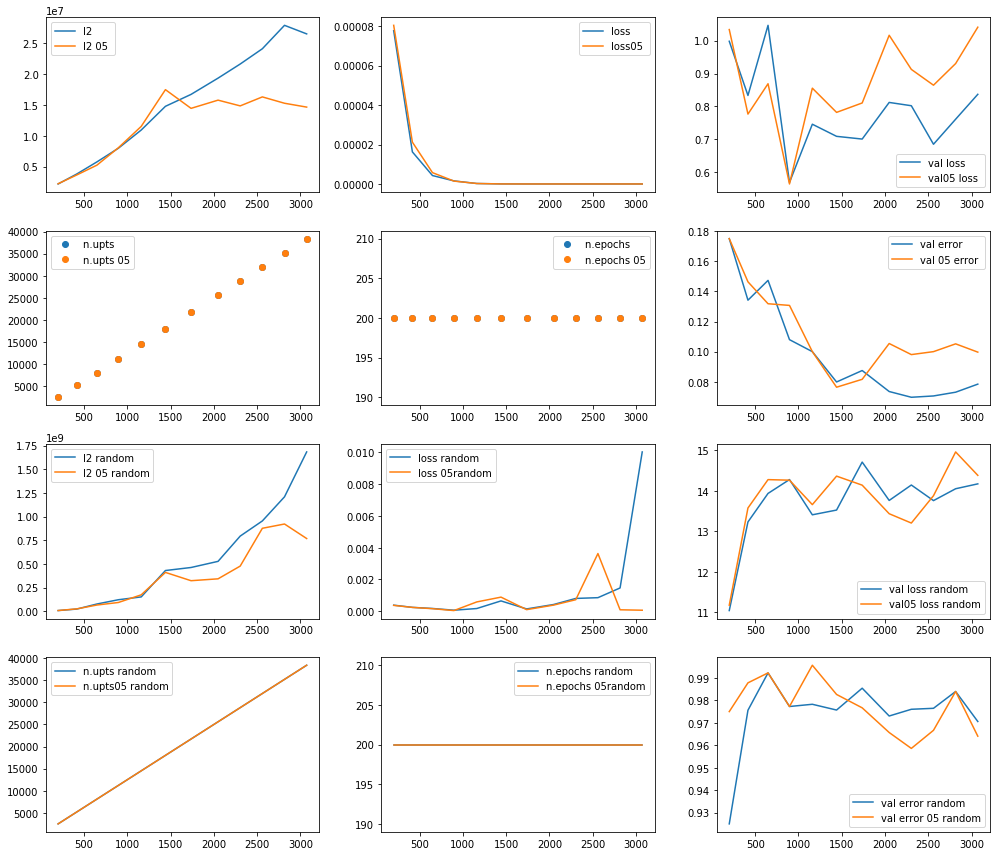

In [29]:
print('               300 epochs')
plt.title('')
f=10**(-0.)
f2=10**-0
n0=0
nn=len(e_r1)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 14
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

plt.subplot(4,3,1)
plt.plot(s_[n0:nn],l2_[n0:nn]*f,'-',label='l2 ')
plt.plot(s_[n0:nn],l205_[n0:nn]*f,'-',label='l2 05 ')
plt.legend()
plt.subplot(4,3,2)
plt.plot(s_[n0:nn],l_[n0:nn],'-',label='loss ')
plt.plot(s_[n0:nn],l05_[n0:nn],'-',label='loss05 ')
plt.legend()
plt.subplot(4,3,3)
plt.plot(s_[n0:nn],vl_[n0:nn]*f2,'-',label='val loss ')
plt.plot(s_[n0:nn],vl05_[n0:nn]*f2,'-',label='val05 loss ')
plt.legend()
plt.subplot(4,3,4)
plt.plot(s_[n0:nn],u_[n0:nn],'o',label='n.upts ')
plt.plot(s_[n0:nn],u05_[n0:nn],'o',label='n.upts 05')
plt.legend()
plt.subplot(4,3,5)
plt.plot(s_[n0:nn],e_[n0:nn],'o',label='n.epochs ')
plt.plot(s_[n0:nn],e05_[n0:nn],'o',label='n.epochs 05')
plt.legend()
plt.subplot(4,3,6)
plt.plot(s_[n0:nn],1-va_[n0:nn],'-',label='val error ')
plt.plot(s_[n0:nn],1-va05_[n0:nn],'-',label='val 05 error ')
plt.legend()
plt.subplot(4,3,7)
plt.plot(s_r[n0:nn],l2_r[n0:nn]*f,'-',label='l2 random')
plt.plot(s_r[n0:nn],l205_r[n0:nn]*f,'-',label='l2 05 random')
plt.legend()
plt.subplot(4,3,8)
plt.plot(s_r[n0:nn],l_r[n0:nn],'-',label='loss random')
plt.plot(s_r[n0:nn],l05_r[n0:nn],'-',label='loss 05random')
plt.legend()
plt.subplot(4,3,9)
plt.plot(s_r[n0:nn],vl_r[n0:nn]*f2,'-',label='val loss random')
plt.plot(s_r[n0:nn],vl05_r[n0:nn]*f2,'-',label='val05 loss random')
plt.legend()
plt.subplot(4,3,10)
plt.plot(s_r[n0:nn],u_r[n0:nn],'-',label='n.upts random')
plt.plot(s_r[n0:nn],u05_r[n0:nn],'-',label='n.upts05 random')
plt.legend()
plt.subplot(4,3,11)
plt.plot(s_r[n0:nn],e_r[n0:nn],'-',label='n.epochs random')
plt.plot(s_r[n0:nn],e05_r[n0:nn],'-',label='n.epochs 05random')
plt.legend()
plt.subplot(4,3,12)
plt.plot(s_r[n0:nn],1-va_r[n0:nn],'-',label='val error random')
plt.plot(s_r[n0:nn],1-va05_r[n0:nn],'-',label='val error 05 random')
plt.legend()

plt.tight_layout()
plt.show()

                ----------------------------  RANDOM LABELS   --------------------------


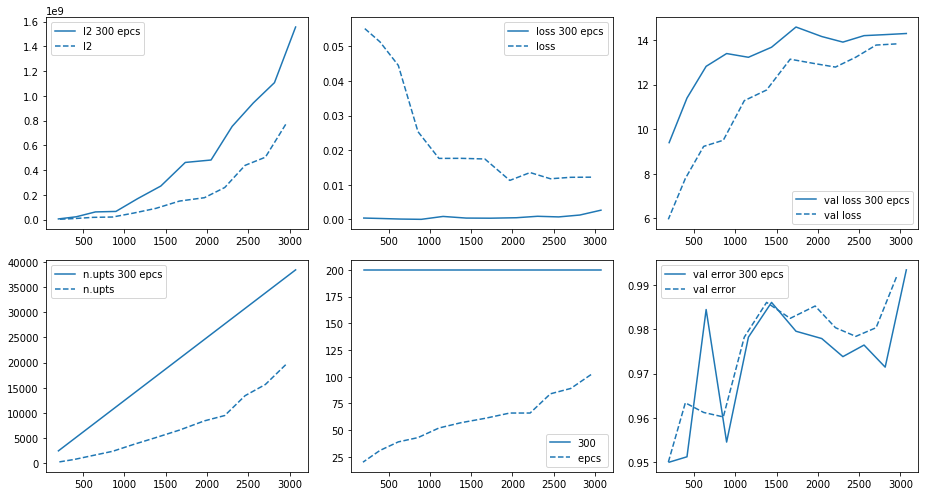

In [152]:
print('                ----------------------------  RANDOM LABELS   --------------------------')
f, f2 =1, 1
n0, nn=0,len(e_r1)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0], fig_size[1] = 13, 7
plt.rcParams["figure.figsize"] = fig_size
c1='tab:blue'
c2='xkcd:tomato'
plt.subplot(2,3,1)
plt.plot(s_r[n0:nn],l2_r[n0:nn]*f,'-',color=c1,label='l2 300 epcs')
plt.plot(s_[n0:nn],l2_r1[n0:nn]*f,'--',color=c1,label='l2  ')
plt.legend()
plt.subplot(2,3,2)
plt.plot(s_r[n0:nn],l_r[n0:nn],'-',color=c1,label='loss 300 epcs')
plt.plot(s_[n0:nn],l_r1[n0:nn],'--',color=c1,label='loss ')
plt.legend()
plt.subplot(2,3,3)
plt.plot(s_r[n0:nn],vl_r[n0:nn]*f2,'-',color=c1,label='val loss 300 epcs')
plt.plot(s_[n0:nn],vl_r1[n0:nn]*f2,'--',color=c1,label='val loss  ')
plt.legend()
plt.subplot(2,3,4)
plt.plot(s_r[n0:nn],u_r[n0:nn],'-',color=c1,label='n.upts 300 epcs')
plt.plot(s_[n0:nn],u_r1[n0:nn],'--',color=c1,label='n.upts ')
plt.legend()
plt.subplot(2,3,5)
plt.plot(s_r[n0:nn],e_r[n0:nn],'-',color=c1,label='300')
plt.plot(s_[n0:nn],e_r1[n0:nn],'--',color=c1,label='epcs ')
plt.legend()
plt.subplot(2,3,6)
plt.plot(s_r[n0:nn],1-va_r[n0:nn],'-',color=c1,label='val error 300 epcs')
plt.plot(s_[n0:nn],1-va_r1[n0:nn],'--',color=c1,label='val error ')
plt.legend()

plt.tight_layout()
plt.show()

                ----------------------------  NORMAL LABELS   --------------------------


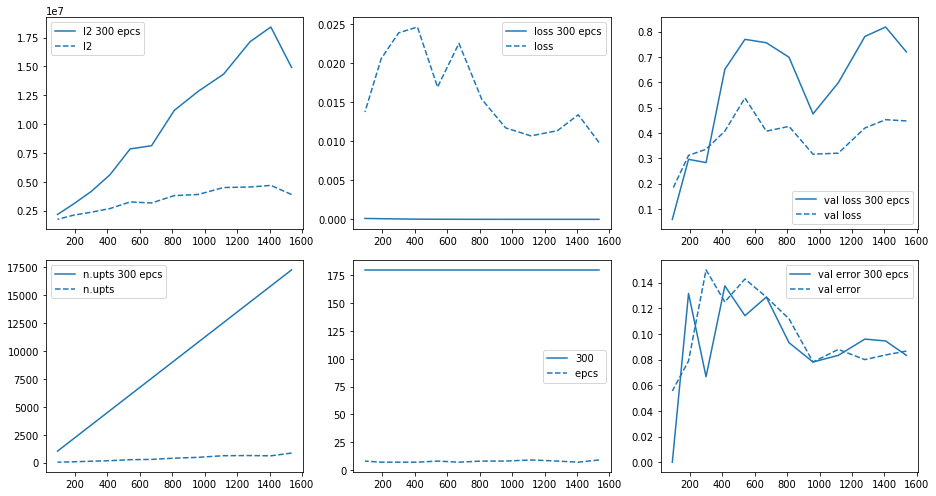

In [85]:
print('                ----------------------------  NORMAL LABELS   --------------------------')
f, f2 =1, 1
n0, nn=0,len(e_r1)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0], fig_size[1] = 13, 7
plt.rcParams["figure.figsize"] = fig_size
c1='tab:blue'
c2='xkcd:tomato'
plt.subplot(2,3,1)
plt.plot(s_r[n0:nn],l2_[n0:nn]*f,'-',color=c1,label='l2 300 epcs')
plt.plot(s_[n0:nn],l2_1[n0:nn]*f,'--',color=c1,label='l2  ')
plt.legend()
plt.subplot(2,3,2)
plt.plot(s_r[n0:nn],l_[n0:nn],'-',color=c1,label='loss 300 epcs')
plt.plot(s_[n0:nn],l_1[n0:nn],'--',color=c1,label='loss ')
plt.legend()
plt.subplot(2,3,3)
plt.plot(s_r[n0:nn],vl_[n0:nn]*f2,'-',color=c1,label='val loss 300 epcs')
plt.plot(s_[n0:nn],vl_1[n0:nn]*f2,'--',color=c1,label='val loss  ')
plt.legend()
plt.subplot(2,3,4)
plt.plot(s_r[n0:nn],u_[n0:nn],'-',color=c1,label='n.upts 300 epcs')
plt.plot(s_[n0:nn],u_1[n0:nn],'--',color=c1,label='n.upts ')
plt.legend()
plt.subplot(2,3,5)
plt.plot(s_r[n0:nn],e_[n0:nn],'-',color=c1,label='300')
plt.plot(s_[n0:nn],e_1[n0:nn],'--',color=c1,label='epcs ')
plt.legend()
plt.subplot(2,3,6)
plt.plot(s_r[n0:nn],1-va_[n0:nn],'-',color=c1,label='val error 300 epcs')
plt.plot(s_[n0:nn],1-va_1[n0:nn],'--',color=c1,label='val error ')
plt.legend()

plt.tight_layout()
plt.show()

      ------------------RANDOM LABELS -------------      -------------  NORMAL LABELS -----------------


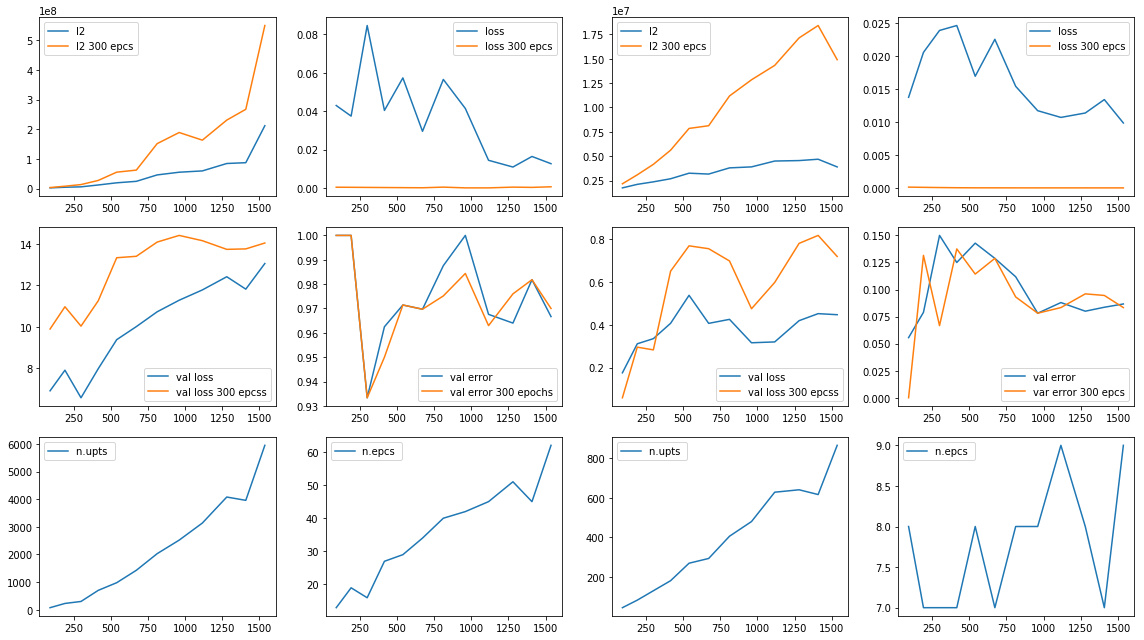

In [86]:
print('      ------------------RANDOM LABELS -------------      -------------  NORMAL LABELS -----------------')
f, f2 =1, 1
n0, nn=0,len(e_r1)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0], fig_size[1] = 16, 9
plt.rcParams["figure.figsize"] = fig_size

plt.subplot(3,4,1)
plt.plot(s_[n0:nn],l2_r1[n0:nn]*f,'-',label='l2  ')
plt.plot(s_r[n0:nn],l2_r[n0:nn]*f,'-',label='l2 300 epcs')
plt.legend()
plt.subplot(3,4,2)
plt.plot(s_[n0:nn],l_r1[n0:nn],'-',label='loss ')
plt.plot(s_r[n0:nn],l_r[n0:nn],'-',label='loss 300 epcs')
plt.legend()
plt.subplot(3,4,5)
plt.plot(s_[n0:nn],vl_r1[n0:nn]*f2,'-',label='val loss  ')
plt.plot(s_r[n0:nn],vl_r[n0:nn]*f2,'-',label='val loss 300 epcss')
plt.legend()
plt.subplot(3,4,6)
plt.plot(s_[n0:nn],1-va_r1[n0:nn],'-',label='val error ')
plt.plot(s_r[n0:nn],1-va_r[n0:nn],'-',label='val error 300 epochs')
plt.legend()
plt.subplot(3,4,9)
plt.plot(s_[n0:nn],u_r1[n0:nn],'-',label='n.upts ')
#plt.plot(s_r[n0:nn],u_r[n0:nn],'-',label='n.upts 300 epochs')
plt.legend()
plt.subplot(3,4,10)
plt.plot(s_[n0:nn],e_r1[n0:nn],'-',label='n.epcs ')
#plt.plot(s_r[n0:nn],e_r[n0:nn],'-',label='300')
plt.legend()
#normal
plt.subplot(3,4,3)
plt.plot(s_[n0:nn],l2_1[n0:nn]*f,'-',label='l2  ')
plt.plot(s_r[n0:nn],l2_[n0:nn]*f,'-',label='l2 300 epcs')
plt.legend()
plt.subplot(3,4,4)
plt.plot(s_[n0:nn],l_1[n0:nn],'-',label='loss ')
plt.plot(s_r[n0:nn],l_[n0:nn],'-',label='loss 300 epcs')
plt.legend()
plt.subplot(3,4,7)
plt.plot(s_[n0:nn],vl_1[n0:nn]*f2,'-',label='val loss  ')
plt.plot(s_r[n0:nn],vl_[n0:nn]*f2,'-',label='val loss 300 epcss')
plt.legend()
plt.subplot(3,4,8)
plt.plot(s_[n0:nn],1-va_1[n0:nn],'-',label='val error ')
plt.plot(s_r[n0:nn],1-va_[n0:nn],'-',label='var error 300 epcs')
plt.legend()
plt.subplot(3,4,11)
plt.plot(s_[n0:nn],u_1[n0:nn],'-',label='n.upts ')
#plt.plot(s_r[n0:nn],u_[n0:nn],'-',label='n.upts 300 epochs')
plt.legend()
plt.subplot(3,4,12)
plt.plot(s_[n0:nn],e_1[n0:nn],'-',label='n.epcs ')
#plt.plot(s_r[n0:nn],e_[n0:nn],'-',label='300')
plt.legend()

plt.tight_layout()
plt.show()

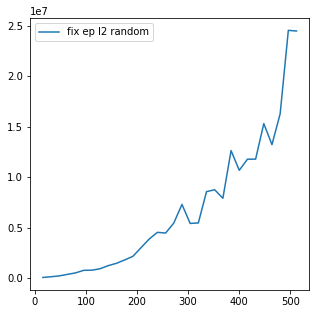

In [744]:
plt.title('')
f=10**(-0.)
f2=10**-0
n0=0
nn=len(e_r1)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 5
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
plt.plot(s_r[n0:nn],l2_r[n0:nn]*f,'-',label='fix ep l2 random')
#plt.plot(s_r[n0:nn],l2_r1[n0:nn]*f,'-',label='l2 random')

plt.legend()

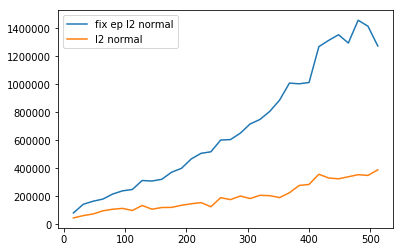

In [614]:
plt.title('')
f=10**(-0.)
f2=10**-0
n0=0
nn=len(e_r1)
plt.plot(s_[n0:nn],l2_[n0:nn],'-',label='fix ep l2 normal')
#plt.plot(s_r[n0:nn],l2_r[n0:nn]*f,'-',label='fix ep l2 random')
plt.plot(s_[n0:nn],l2_1[n0:nn],'-',label='l2 normal')
#plt.plot(s_r[n0:nn],l2_r1[n0:nn]*f,'-',label='l2 random')

plt.legend()

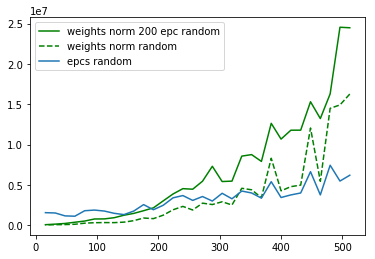

In [675]:
plt.plot(s_[n0:nn],l2_r[n0:nn],'-',color='green',label='weights norm 200 epc random')
plt.plot(s_[n0:nn],l2_r1[n0:nn],'--',color='green',label='weights norm random')
plt.plot(s_r[n0:nn],e_r1[n0:nn]*40000,'-',label='epcs random')
plt.legend()
#although there is some correlation btw the number of epochs and the l2 norms, meaning the norms are usually bigger for 
#more training epochs, we still see that for a fixed training length the weights norm will increase with training data
#number of iterations vs number of epochs

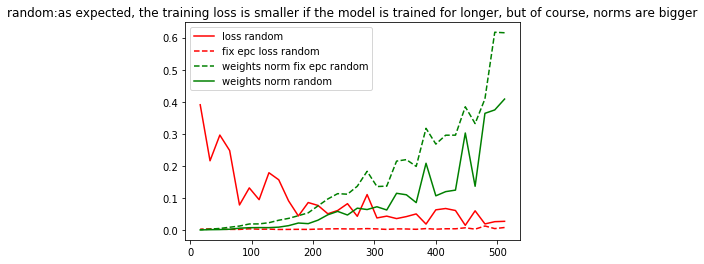

In [692]:
plt.title('random:as expected, the training loss is smaller if the model is trained for longer, but of course, norms are bigger')
f=10**(-7.6)
f2=10**-0
n0=0
nn=len(e_r1)

plt.plot(s_r[n0:nn],l_r1[n0:nn],'-',color='red',label='loss random')
plt.plot(s_r[n0:nn],l_r[n0:nn],'--',color='red',label='fix epc loss random')

#plt.plot(s_[n0:nn],l2_[n0:nn],'-',color='blue',label='weights norm fix epc normal')
#plt.plot(s_[n0:nn],l2_1[n0:nn],'--',color='blue',label='weights norm normal')

plt.plot(s_[n0:nn],l2_r[n0:nn]*f,'--',color='green',label='weights norm fix epc random')
plt.plot(s_[n0:nn],l2_r1[n0:nn]*f,'-',color='green',label='weights norm random')

#plt.plot(s_r[n0:nn],200*e_1[n0:nn]/e_,'-',label='ratio epcs normal')
#plt.plot(s_r[n0:nn],e_[n0:nn]/100,'-',label='epcs normal')

#plt.plot(s_r[n0:nn],e_r1[n0:nn]/100,'-',label='epcs random')


plt.legend()

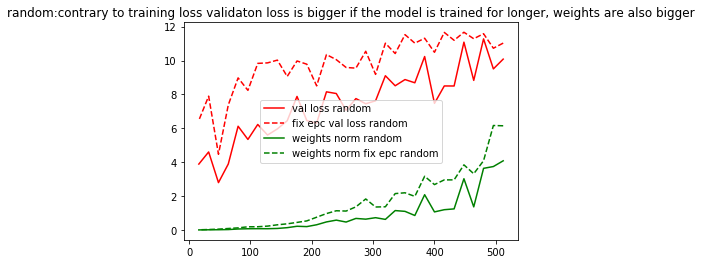

In [691]:
plt.title('random:contrary to training loss validaton loss is bigger if the model is trained for longer, weights are also bigger')
f=10**(-6.6)
f2=10**-0
n0=0
nn=len(e_r1)

plt.plot(s_r[n0:nn],vl_r1[n0:nn],'-',color='red',label='val loss random')
plt.plot(s_r[n0:nn],vl_r[n0:nn],'--',color='red',label='fix epc val loss random')

#plt.plot(s_[n0:nn],l2_[n0:nn],'-',color='blue',label='weights norm fix epc normal')
#plt.plot(s_[n0:nn],l2_1[n0:nn],'--',color='blue',label='weights norm normal')

plt.plot(s_[n0:nn],l2_r1[n0:nn]*f,'-',color='green',label='weights norm random')
plt.plot(s_[n0:nn],l2_r[n0:nn]*f,'--',color='green',label='weights norm fix epc random')

#plt.plot(s_r[n0:nn],200*e_1[n0:nn]/e_,'-',label='ratio epcs normal')
#plt.plot(s_r[n0:nn],e_[n0:nn]/100,'-',label='epcs normal')

#plt.plot(s_r[n0:nn],e_r1[n0:nn]/100,'-',label='epcs random')


plt.legend()

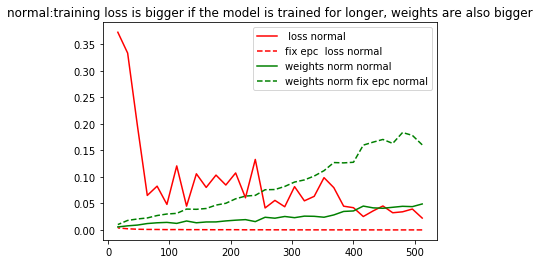

In [698]:
plt.title('normal:as expected training loss is smaller if the model is trained for longer,but weights are bigger')
f=10**(-6.9)
f2=10**-0
n0=0
nn=len(e_r1)

plt.plot(s_r[n0:nn],l_1[n0:nn],'-',color='red',label=' loss normal')
plt.plot(s_r[n0:nn],l_[n0:nn],'--',color='red',label='fix epc  loss normal')
plt.plot(s_[n0:nn],l2_1[n0:nn]*f,'-',color='green',label='weights norm normal')
plt.plot(s_[n0:nn],l2_[n0:nn]*f,'--',color='green',label='weights norm fix epc normal')

plt.legend()

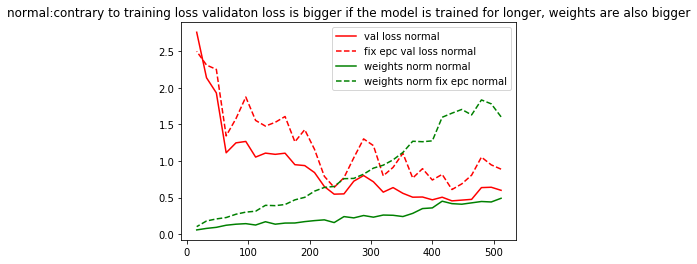

In [696]:
plt.title('normal:contrary to training loss validaton loss is bigger if the model is trained for longer, weights are also bigger')
f=10**(-5.9)
f2=10**-0
n0=0
nn=len(e_r1)

plt.plot(s_r[n0:nn],vl_1[n0:nn],'-',color='red',label='val loss normal')
plt.plot(s_r[n0:nn],vl_[n0:nn],'--',color='red',label='fix epc val loss normal')
plt.plot(s_[n0:nn],l2_1[n0:nn]*f,'-',color='green',label='weights norm normal')
plt.plot(s_[n0:nn],l2_[n0:nn]*f,'--',color='green',label='weights norm fix epc normal')

plt.legend()

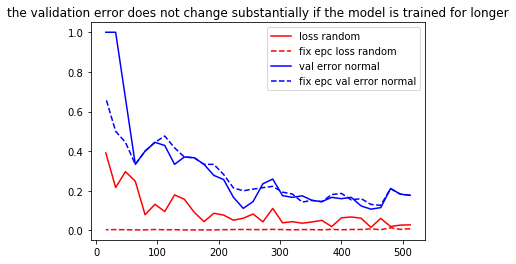

In [653]:
plt.title('the validation error does not change substantially if the model is trained for longer')
f=10**(-7.)
f2=10**-0
n0=0
nn=len(e_r1)

plt.plot(s_r[n0:nn],l_r1[n0:nn],'-',color='red',label='loss random')
plt.plot(s_r[n0:nn],l_r[n0:nn],'--',color='red',label='fix epc loss random')

plt.plot(s_[n0:nn],1-va_1[n0:nn],'-',color='blue',label='val error normal')
plt.plot(s_[n0:nn],1-va_[n0:nn],'--',color='blue',label='fix epc val error normal')

#plt.plot(s_r[n0:nn],e_1[n0:nn]/100,'-',label='epcs normal')
#plt.plot(s_r[n0:nn],e_[n0:nn]/100,'-',label='epcs normal')

#plt.plot(s_r[n0:nn],e_r1[n0:nn]/100,'-',label='epcs random')


plt.legend()

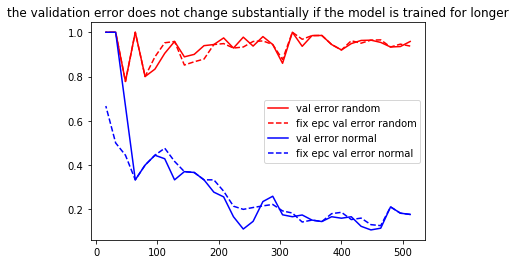

In [652]:
plt.title('the validation error does not change substantially if the model is trained for longer')
f=10**(-7.)
f2=10**-0
n0=0
nn=len(e_r1)

plt.plot(s_r[n0:nn],1-va_r1[n0:nn],'-',color='red',label='val error random')
plt.plot(s_r[n0:nn],1-va_r[n0:nn],'--',color='red',label='fix epc val error random')

plt.plot(s_[n0:nn],1-va_1[n0:nn],'-',color='blue',label='val error normal')
plt.plot(s_[n0:nn],1-va_[n0:nn],'--',color='blue',label='fix epc val error normal')

#plt.plot(s_r[n0:nn],e_1[n0:nn]/100,'-',label='epcs normal')
#plt.plot(s_r[n0:nn],e_[n0:nn]/100,'-',label='epcs normal')

#plt.plot(s_r[n0:nn],e_r1[n0:nn]/100,'-',label='epcs random')


plt.legend()

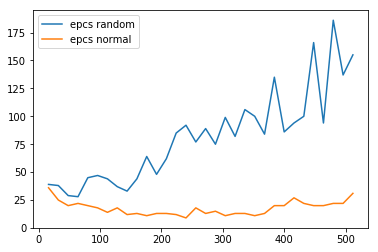

In [619]:
plt.title('')

plt.plot(s_r[n0:nn],e_r1[n0:nn],'-',label='epcs random')
plt.plot(s_[n0:nn],e_1[n0:nn],'-',label='epcs normal')

plt.legend()

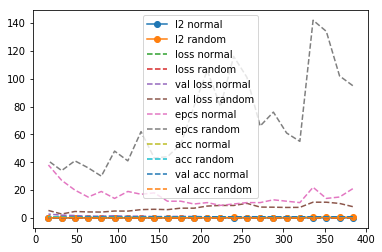

In [500]:
plt.title('')
fac=10**(-6.9)
n0=0
nn=len(e_r1)
plt.plot(s_[n0:nn],l2_1[n0:nn]*fac,'o-',label='l2 normal')
plt.plot(s_r[n0:nn],l2_r1[n0:nn]*fac,'o-',label='l2 random')
plt.plot(s_[n0:nn],l_1[n0:nn],'--',label='loss normal')
plt.plot(s_r[n0:nn],l_r1[n0:nn],'--',label='loss random')
plt.plot(s_[n0:nn],vl_1[n0:nn],'--',label='val loss normal')
plt.plot(s_r[n0:nn],vl_r1[n0:nn],'--',label='val loss random')
plt.plot(s_[n0:nn],e_1[n0:nn],'--',label='epcs normal')
plt.plot(s_r[n0:nn],e_r1[n0:nn],'--',label='epcs random')
plt.plot(s_[n0:nn],a_1[n0:nn],'--',label='acc normal')
plt.plot(s_r[n0:nn],a_r1[n0:nn],'--',label='acc random')
plt.plot(s_[n0:nn],va_1[n0:nn],'--',label='val acc normal')
plt.plot(s_r[n0:nn],va_r1[n0:nn],'--',label='val acc random')

plt.legend()

In [585]:
def norm(v):
    return (v-min(v))/(max(v)-min(v))

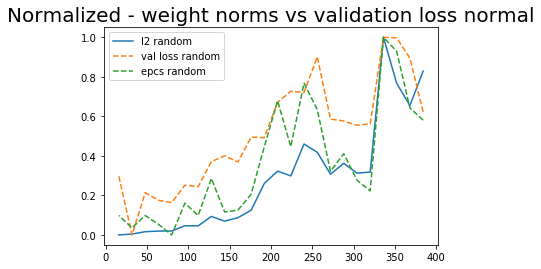

In [591]:
plt.title('Normalized - weight norms vs validation loss normal', size=20)
fac=10**(-5.5)
fac2=10**(0)
n0=0
nn=len(e_r1)
plt.plot(s_[n0:nn],norm(l2_r1[n0:nn]),'-',label='l2 random')
#plt.plot(s_[n0:nn],norm(l_r1[n0:nn]),'--',label='loss random')
plt.plot(s_[n0:nn],norm(vl_r1[n0:nn]),'--',label='val loss random')
plt.plot(s_r[n0:nn],norm(e_r1[n0:nn]),'--',label='epcs random')



plt.legend()

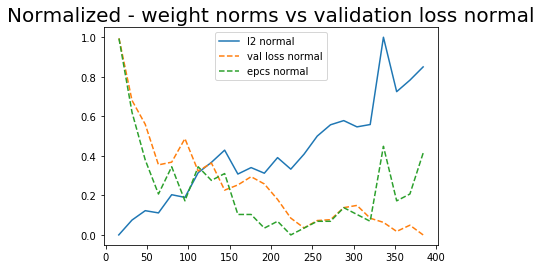

In [592]:
plt.title('Normalized - weight norms vs validation loss normal', size=20)
fac=10**(-5.5)
fac2=10**(0)
n0=0
nn=len(e_r1)
plt.plot(s_[n0:nn],norm(l2_1[n0:nn]),'-',label='l2 normal')
plt.plot(s_r[n0:nn],norm(vl_1[n0:nn]),'--',label='val loss normal')
plt.plot(s_r[n0:nn],norm(e_1[n0:nn]),'--',label='epcs normal')


plt.legend()

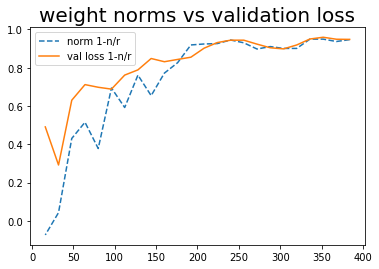

In [548]:
plt.title('weight norms vs validation loss',size=20)
fac=10**(-5.9)
fac2=10**(0)
n0=0
nn=len(e_r1)
plt.plot(s_[n0:nn],1-l2_1[n0:nn]/l2_r1[n0:nn],'--',label='norm 1-n/r')
#plt.plot(s_[n0:nn],1-l_1[n0:nn]/l_r1[n0:nn],'--',label='loss 1-n/r')
plt.plot(s_[n0:nn],1-vl_1[n0:nn]/vl_r1[n0:nn],'-',label='val loss 1-n/r')
#plt.plot(s_[n0:nn],1-e_1[n0:nn]/e_r1[n0:nn],'-',label='epcs 1-n/r')
#plt.plot(s_[n0:nn],1-(1-va_1[n0:nn])/(1-va_r1[n0:nn]),'--',label='val error 1-n/r')
plt.legend()

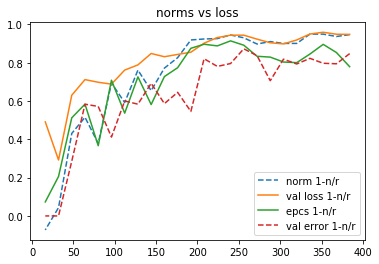

In [529]:
plt.title('norms vs loss')
fac=10**(-5.9)
fac2=10**(0)
n0=0
nn=len(e_r1)
plt.plot(s_[n0:nn],1-l2_1[n0:nn]/l2_r1[n0:nn],'--',label='norm 1-n/r')
#plt.plot(s_[n0:nn],1-l_1[n0:nn]/l_r1[n0:nn],'--',label='loss 1-n/r')
plt.plot(s_[n0:nn],1-vl_1[n0:nn]/vl_r1[n0:nn],'-',label='val loss 1-n/r')
plt.plot(s_[n0:nn],1-e_1[n0:nn]/e_r1[n0:nn],'-',label='epcs 1-n/r')
plt.plot(s_[n0:nn],1-(1-va_1[n0:nn])/(1-va_r1[n0:nn]),'--',label='val error 1-n/r')

plt.legend()

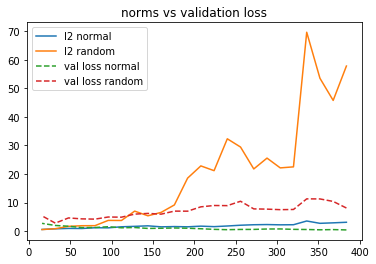

In [501]:
plt.title('norms vs validation loss')
fac=10**(-4.9)
fac2=10**(0)
n0=0
nn=len(e_r1)
plt.plot(s_[n0:nn],l2_1[n0:nn]*fac,'-',label='l2 normal')
plt.plot(s_r[n0:nn],l2_r1[n0:nn]*fac,'-',label='l2 random')
plt.plot(s_[n0:nn],vl_1[n0:nn],'--',label='val loss normal')
plt.plot(s_r[n0:nn],vl_r1[n0:nn],'--',label='val loss random')

plt.legend()

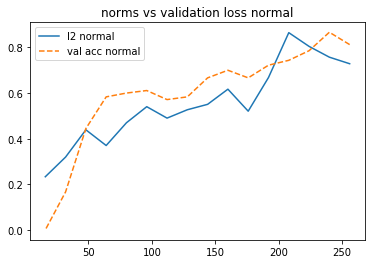

In [457]:
plt.title('norms vs validation loss normal')
fac=10**(-5.3)
fac2=10**(0)
n0=0
nn=len(e_r1)
plt.plot(s_[n0:nn],l2_1[n0:nn]*fac,'-',label='l2 normal')
#plt.plot(s_[n0:nn],vl_1[n0:nn],'--',label='val loss normal')
plt.plot(s_r[n0:nn],va_1[n0:nn],'--',label='val acc normal')


plt.legend()

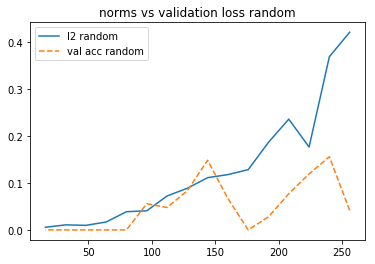

In [459]:
plt.title('norms vs validation loss random')
fac=10**(-6.9)
fac2=1
n0=0
nn=len(e_r1)
plt.plot(s_r[n0:nn],l2_r1[n0:nn]*fac,'-',label='l2 random')
#plt.plot(s_r[n0:nn],vl_r1[n0:nn],'--',label='val loss random')
plt.plot(s_r[n0:nn],va_r1[n0:nn],'--',label='val acc random')

plt.legend()

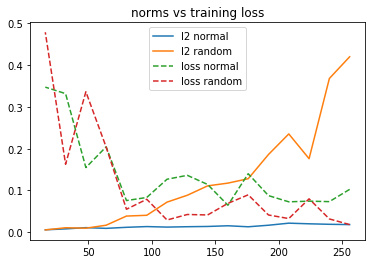

In [449]:
plt.title('norms vs training loss')
fac=10**(-6.9)
fac2=10**(0)
n0=0
nn=len(e_r1)
plt.plot(s_[n0:nn],l2_1[n0:nn]*fac,'-',label='l2 normal')
plt.plot(s_r[n0:nn],l2_r1[n0:nn]*fac,'-',label='l2 random')
plt.plot(s_[n0:nn],l_1[n0:nn],'--',label='loss normal')
plt.plot(s_r[n0:nn],l_r1[n0:nn],'--',label='loss random')

plt.legend()

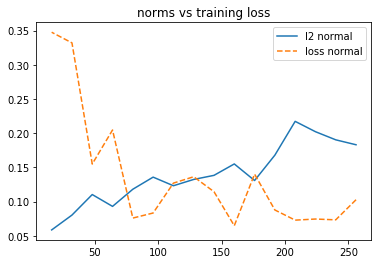

In [495]:
plt.title('norms vs training loss')
fac=10**(-5.9)
fac2=10**(0)
n0=0
nn=len(e_r1)
plt.plot(s_[n0:nn],l2_1[n0:nn]*fac,'-',label='l2 normal')
plt.plot(s_[n0:nn],l_1[n0:nn],'--',label='loss normal')

plt.legend()

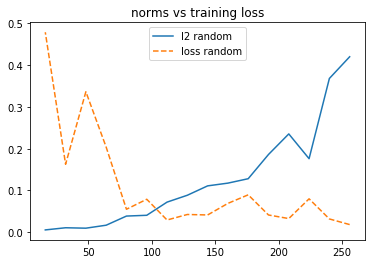

In [496]:
plt.title('norms vs training loss')
fac=10**(-6.9)
fac2=10**(0)
n0=0
nn=len(e_r1)
plt.plot(s_r[n0:nn],l2_r1[n0:nn]*fac,'-',label='l2 random')
plt.plot(s_r[n0:nn],l_r1[n0:nn],'--',label='loss random')

plt.legend()

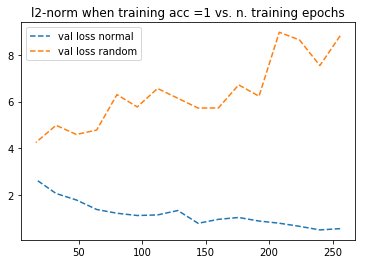

In [377]:
plt.title('l2-norm when training acc =1 vs. n. training epochs')
fac=10**(-6.9)
fac2=10**(0)
n0=0
nn=len(e_r1)
#plt.plot(s_[n0:nn],l2_1[n0:nn]*fac,'o-',label='l2 normal')
#plt.plot(s_r[n0:nn],l2_r1[n0:nn]*fac,'o-',label='l2 random')
#plt.plot(s_[n0:nn],l_1[n0:nn],'-',label='loss normal')
#plt.plot(s_r[n0:nn],l_r1[n0:nn],'-',label='loss random')
plt.plot(s_[n0:nn],vl_1[n0:nn]*fac2,'--',label='val loss normal')
plt.plot(s_r[n0:nn],vl_r1[n0:nn]*fac2,'--',label='val loss random')

plt.legend()

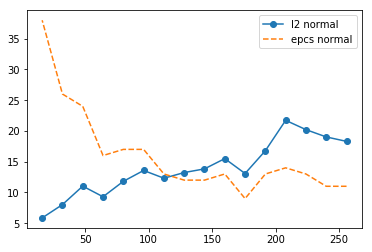

In [471]:
plt.title('')
fac=10**(-3.9)
n0=0
nn=len(e_r1)
plt.plot(s_[n0:nn],l2_1[n0:nn]*fac,'o-',label='l2 normal')
#plt.plot(s_r[n0:nn],l2_r1[n0:nn]*fac,'o-',label='l2 random')
plt.plot(s_[n0:nn],e_1[n0:nn],'--',label='epcs normal')
#plt.plot(s_r[n0:nn],e_r1[n0:nn],'--',label='epcs random')

plt.legend()

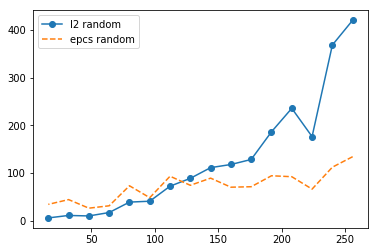

In [472]:
plt.title('')
fac=10**(-3.9)
n0=0
nn=len(e_r1)
#plt.plot(s_[n0:nn],l2_1[n0:nn]*fac,'o-',label='l2 normal')
plt.plot(s_r[n0:nn],l2_r1[n0:nn]*fac,'o-',label='l2 random')
#plt.plot(s_[n0:nn],e_1[n0:nn],'--',label='epcs normal')
plt.plot(s_r[n0:nn],e_r1[n0:nn],'--',label='epcs random')

plt.legend()

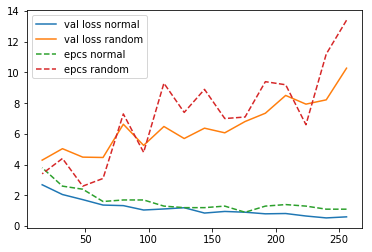

In [481]:
plt.title('')
fac=10**(-6.9)
n0=0
nn=len(e_r1)

plt.plot(s_[n0:nn],vl_1[n0:nn],'-',label='val loss normal')
plt.plot(s_r[n0:nn],vl_r1[n0:nn],'-',label='val loss random')
plt.plot(s_[n0:nn],e_1[n0:nn]/10,'--',label='epcs normal')
plt.plot(s_r[n0:nn],e_r1[n0:nn]/10,'--',label='epcs random')
#plt.plot(s_[n0:nn],va_1[n0:nn],'-',label='val acc normal')
#plt.plot(s_r[n0:nn],va_r1[n0:nn],'-',label='val acc random')

plt.legend()

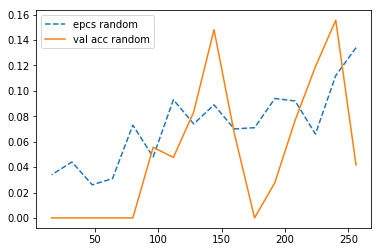

In [488]:
plt.title('')
fac=1
n0=0
nn=len(e_r1)

plt.plot(s_r[n0:nn],e_r1[n0:nn]/1000,'--',label='epcs random')
plt.plot(s_r[n0:nn],va_r1[n0:nn],'-',label='val acc random')

plt.legend()

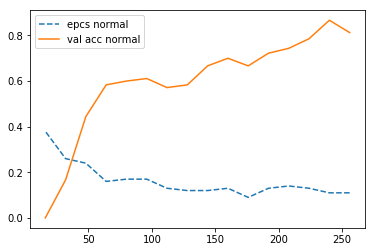

In [491]:
plt.title('')
fac=10**(-6.9)
n0=0
nn=len(e_r1)

#plt.plot(s_[n0:nn],vl_1[n0:nn],'-',label='val loss normal')
#plt.plot(s_r[n0:nn],vl_r1[n0:nn],'-',label='val loss random')
plt.plot(s_[n0:nn],e_1[n0:nn]/100,'--',label='epcs normal')
#plt.plot(s_r[n0:nn],e_r1[n0:nn]/50,'--',label='epcs random')
plt.plot(s_[n0:nn],va_1[n0:nn],'-',label='val acc normal')
#plt.plot(s_r[n0:nn],va_r1[n0:nn],'-',label='val acc random')

plt.legend()

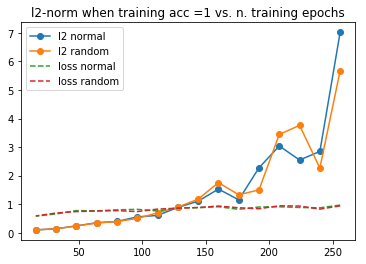

In [652]:
plt.title('l2-norm when training acc =1 vs. n. training epochs')
fac=10**(-5.6)
n0=0
nn=len(epcs_r1)
plt.plot(sizes[n0:nn],l2_norms_1[n0:nn]*fac,'o-',label='l2 normal')
plt.plot(sizes_r[n0:nn],l2_norms_r1[n0:nn]*fac,'o-',label='l2 random')

plt.plot(sizes[n0:nn],1-losses_1[n0:nn],'--',label='loss normal')
plt.plot(sizes_r[n0:nn],1-losses_r1[n0:nn],'--',label='loss random')
plt.legend()

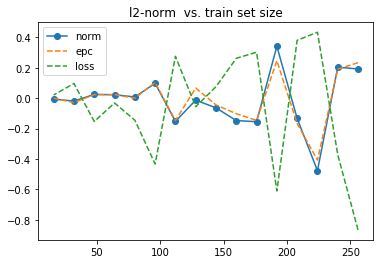

In [657]:
plt.title('l2-norm  vs. train set size')
nn=len(epcs_1)
plt.plot(sizes[:nn],1-l2_norms_r1[:nn]/l2_norms_1,'o-',label='norm')
plt.plot(sizes[:nn],1-epcs_r1[:nn]/epcs_1[:nn],'--',label='epc')
plt.plot(sizes[:nn],1-losses_r1[:nn]/losses_1[:nn],'--',label='loss')
plt.legend()

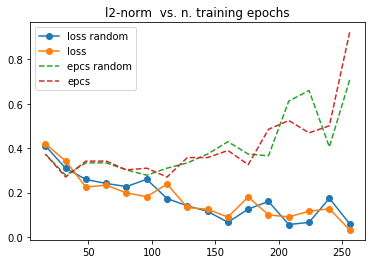

In [677]:
plt.title('l2-norm  vs. n. training epochs')
fac=10**(-2.1)
nn=len(epcs_r1)
plt.plot(sizes_r[:nn],losses_r1[:nn],'o-',label='loss random')
plt.plot(sizes_r[:nn],losses_1[:nn],'o-',label='loss')
plt.plot(sizes_r[:nn],epcs_r1[:nn]*fac,'--',label='epcs random')
plt.plot(sizes_r[:nn],epcs_1[:nn]*fac,'--',label='epcs')
plt.legend()

In [453]:
print(accs_r)
print(l2_norms_r)
print(epcs_r)

[1. 1. 1. 1. 1. 1. 1. 1.]
[  334520.21908828  1329231.12645824  2569540.06778479  6938956.48500733
  7116248.34139045 13233544.96104112 15963556.24048426  8049621.4939405 ]
[2000 2000 2000 2000 2000 2000 2000 2000]


In [466]:
print(accs_r1)
print(l2_norms_r1)
print(epcs_r1)

[1. 1. 1. 1. 1. 1. 1. 1.]
[  123032.41200108   364461.9129236    450542.99830823   816158.84396578
   903964.3169169   1420775.63498388  4827854.17482618 10693863.54473018]
[ 67  34  37  53  47  80 139 284]


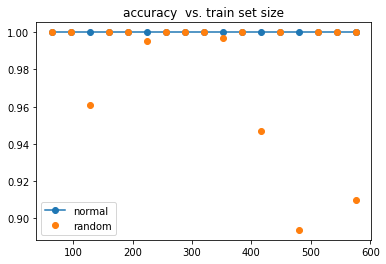

In [102]:
##### rescalesnorm=np.asarray(l2_norms_r)*10**(-8)
plt.title('accuracy  vs. train set size')
plt.plot(sizes,np.asarray(accs),'o-',label='normal')
plt.plot(sizes,np.asarray(accs_r),'o',label='random')
plt.legend()

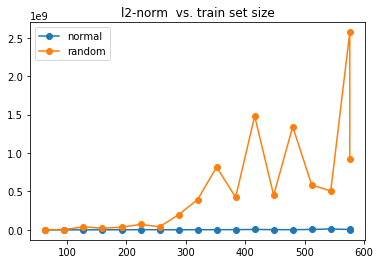

In [103]:
plt.title('l2-norm  vs. train set size')
fac=1
plt.plot(sizes,l2_norms*fac,'o-',label='normal')
plt.plot(sizes_r,l2_norms_r*fac,'o-',label='random')
#plt.plot(sizes,epcs,'--',label='n.epochs')
#plt.plot(sizes,epcs_r,'--',label='n.epochs_r')
plt.legend()

In [ ]:
def traincb(x_train,y_train,total_size=1000,batch_size=16,tol=12,size=50,prt_rt=100,random_labels=False):
    np.random.seed(5)
    l2_norms=[]
    accs=[] 
    ys=y_train.copy()
    np.random.shuffle(ys)
    sizes=[]
    epochs=[]
    losses=[]
    
    
    accs1=[]
    l2_norms1=[]
    epochs1=[]
    losses1=[]
    
    idx = np.random.randint(X_train.shape[0], size=total_size)
    X_t = X_train[idx,:]
     
    if random_labels==False:
        y_t = y_train[idx]
    else: 
        ys=y_train.copy()
        np.random.shuffle(ys)
        y_t0 = ys[idx]
        y_t = np.asarray([y_t0[i] if (y_t0[i]!=y_train[idx][i]).any() else [el for el in y_t0[:20] if (el != y_t0[i]).any()][0] for i in range(len(y_t0))])
        print(np.mean([np.sum((y_t==y_train[idx])[i,:])== 10 for i in range(len(y_t))]))
   
    size2=size
    i=int(X_t.shape[0]/size2)
    ac=0
    n_epochs=10

    while i >=0 and i*size<=total_size: 
        if len(epochs)>1:
            n_epochs=max(10,max(epochs))
            for j in range(len(epochs)-1):
               # print(epochs[j+1],epochs[:j+1])
                if epochs[j+1]>max(epochs[:j+1]):
                    print('Warning:increase epochs to ',epochs[j+1])
        
        while ac<0.9999:   
            
            sizes.append(y_t[:(i+1)*size].shape[0])
            model.load_weights('model1.h5')
            cb = MModelCheckpoint(monitor='acc', monitor_value=0.9999)
            training = model.fit(X_t[:(i+1)*size], y_t[:(i+1)*size], 
                  batch_size, epochs=n_epochs,verbose=0,callbacks=[cb]);
            
            ac=training.history['acc'][-1]
            n_epochs+=5

        if cb.epochs != []:
            #print('n.epochs since acc >= 0.5',cb.epochs[0])
            accs1.append(cb.accuracies[0])
            F11 = cb.norms1[0]
            F21 = cb.norms2[0]
            F31 = cb.norms3[0]
            l2_norm1=4*F11**2*F21**2*F31**2
            l2_norms1.append(l2_norm1)
            epochs1.append(cb.epochs[0])
            losses1.append(cb.losses[0])

            

        F1 =np.linalg.norm(l1.get_weights()[0],'fro')
        F2 =np.linalg.norm(l2.get_weights()[0],'fro')
        F3 =np.linalg.norm(l3.get_weights()[0],'fro')
        #print(F11[-1],F1) check!
        l2_norm=4*F1**2*F2**2*F3**2
        l2_norms.append(l2_norm)
        losses.append(training.history['loss'])
        accs.append(training.history['acc'][-1]) 
        #print(cb.accuracies[-1],accs[-1]) #acc check!
        losses.append(training.history['loss'])
        epochs.append(n_epochs)
        print(n_epochs,epochs)
    
        if (i+1)*size%prt_rt==0:
            print('size:',(i+1)*size, '  --  accu:',np.round(training.history['acc'][-1],6), 'after',n_epochs,'epochs')
        i=i-1
        size=size
 
    return np.asarray(sizes), np.asarray(accs), np.asarray(losses), np.asarray(l2_norms), np.asarray(epochs), np.asarray(accs1), np.asarray(losses1), np.asarray(l2_norms1), np.asarray(epochs1)
    

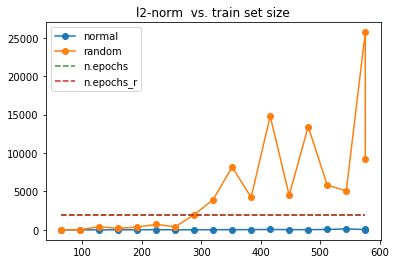

In [104]:
plt.title('l2-norm  vs. train set size')
plt.plot(sizes,l2_norms*10**(-5),'o-',label='normal')
plt.plot(sizes_r,l2_norms_r*10**(-5),'o-',label='random')
plt.plot(sizes,epcs,'--',label='n.epochs')
plt.plot(sizes,epcs_r,'--',label='n.epochs_r')
plt.legend()

In [30]:
print(sizes[5])
print(l2_norms_r[5]) 
#== 305124353.0866239
accs_r[5]

392
60522879.593511514


0.9897959183673469

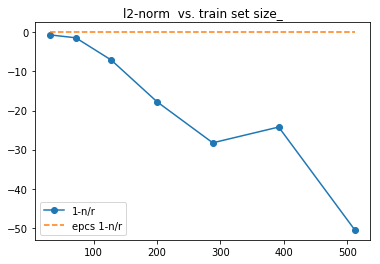

In [32]:
plt.title('l2-norm  vs. train set size_')
nn=15
plt.plot(sizes[:nn],np.asarray(1-l2_norms_r/l2_norms)[:nn],'o-',label='1-n/r')
plt.plot(sizes[:nn],np.asarray(1-epcs_r/epcs)[:nn],'--',label='epcs 1-n/r')

#plt.plot(sizes,np.asarray(l2_norms),'o-',label='normal')
#plt.plot(sizes,np.asarray(l2_norms_r),'o-',label='random')
plt.legend()

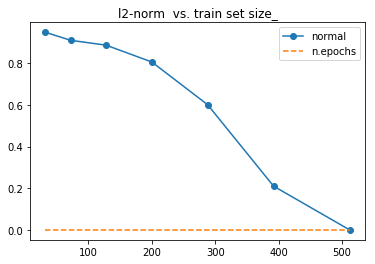

In [33]:
plt.title('l2-norm  vs. train set size_')
nn=18
plt.plot(sizes[:nn],np.asarray(1-l2_norms/np.max(l2_norms))[:nn],'o-',label='normal')
plt.plot(sizes[:nn],np.asarray(1-epcs/np.max(epcs))[:nn],'--',label='n.epochs')

plt.legend()

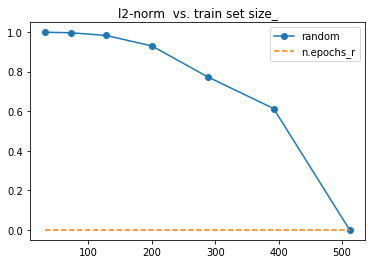

In [34]:
plt.title('l2-norm  vs. train set size_')
nn=16
plt.plot(sizes[:nn],np.asarray(1-l2_norms_r/np.max(l2_norms_r))[:nn]*10**(-0.0),'o-',label='random')
plt.plot(sizes[:nn],np.asarray(1-epcs_r/np.max(epcs_r))[:nn],'--',label='n.epochs_r')

plt.legend()

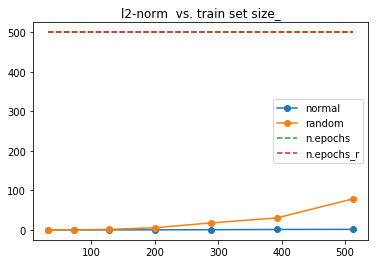

In [35]:
plt.title('l2-norm  vs. train set size_')
n0=0
nn=21
fac=10**(-6.3)
plt.plot(sizes[n0:nn],np.asarray(l2_norms)[n0:nn]*fac,'o-',label='normal')
plt.plot(sizes[n0:nn],np.asarray(l2_norms_r)[n0:nn]*fac,'o-',label='random')
plt.plot(sizes[n0:nn],np.asarray(epcs)[n0:nn],'--',label='n.epochs')
plt.plot(sizes[n0:nn],np.asarray(epcs_r)[n0:nn],'--',label='n.epochs_r')
plt.legend()

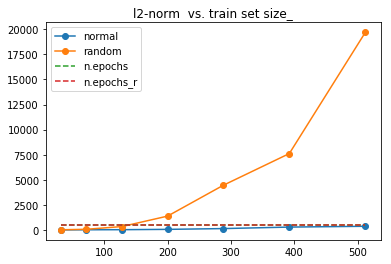

In [36]:
plt.title('l2-norm  vs. train set size_')
n0=0
nn=9
plt.plot(sizes[n0:nn],np.asarray(l2_norms)[n0:nn]*10**(-3.9),'o-',label='normal')
plt.plot(sizes[n0:nn],np.asarray(l2_norms_r)[n0:nn]*10**(-3.9),'o-',label='random')
plt.plot(sizes[n0:nn],np.asarray(epcs)[n0:nn],'--',label='n.epochs')
plt.plot(sizes[n0:nn],np.asarray(epcs_r)[n0:nn],'--',label='n.epochs_r')
plt.legend()

In [ ]:
##### list all data in history
print(training.history.keys())
# summarize history for accuracy
plt.plot(training.history['acc'])
#plt.plot(training.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left') #plt.legend(['train', 'test'], loc='upper left')

plt.show()
# summarize history for loss
plt.plot(training.history['loss'])
#plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [107]:
def train(x_train,y_train,total_size=1000,batch_size=16,tol=12,size=50,prt_rt=100,random_labels=False):
    np.random.seed(5)
    l2_norms=[]
    accs=[] 
    ys=y_train.copy()
    np.random.shuffle(ys)
    sizes=[]
    epochs=[]
    losses=[]
    
    idx = np.random.randint(X_train.shape[0], size=total_size)
    X_t = X_train[idx,:]
     
    if random_labels==False:
        y_t = y_train[idx]
    else: 
        ys=y_train.copy()
        np.random.shuffle(ys)
        y_t0 = ys[idx]
        y_t = np.asarray([y_t0[i] if (y_t0[i]!=y_train[idx][i]).any() else [el for el in y_t0[:20] if (el != y_t0[i]).any()][0] for i in range(len(y_t0))])
      
        print(np.mean([np.sum((y_t==y_train[idx])[i,:])== 10 for i in range(len(y_t))]))
   
    size2=size
    i=1
    
    while i <= int(X_t.shape[0]/size2) and i*size<=total_size:
    
        sizes.append(y_t[:(i+1)*size].shape[0])
        model.load_weights('model1.h5')
        n_epochs=10
        training = model.fit(X_t[:(i+1)*size], y_t[:(i+1)*size], 
              batch_size, epochs=n_epochs,verbose=0);
        accuracies=[training.history['acc'][-1]]
        ac = accuracies[-1]
        
        if ac<1:
            stop=False
            
            while ac<1.0 and stop==False:
                #print('entered')
                if len(accuracies)>2:
                    #print('accs list len',len(accuracies))
                    #print('last acc is:',accuracies[-1],'- is it improvement over 0.9*avg over previous 2?:',np.mean(accuracies[-4:-1]))
                    if np.round(accuracies[-1],7) >= np.round(0.6*np.mean(accuracies[-4:-1]),7) and np.round(accuracies[-1],7) != np.round(np.mean(accuracies[-tol:-1]),7):
                       # print(np.round(accuracies[-1],6),np.round(np.mean(accuracies[-4:-1]),6))
                        if len(accuracies)%10==0:
                            print('improved and keep train after',n_epochs,'epochs with acc',ac, ', size',(i+1)*size)
                        training = model.fit(X_t[:(i+1)*size], y_t[:(i+1)*size], 
                              batch_size, epochs=10,verbose=0)
                
                        accuracies.append(training.history['acc'][-1])
                        ac = accuracies[-1]
                        n_epochs=n_epochs+10
                        
                    else:
                        print('no, stopped train,n. of epochs:',n_epochs,'last accs:',np.round(accuracies[-5:],7),'-size',(i+1)*size)
                        stop=True
                        
                else:
                   # print('len =',len(accuracies))
                    training = model.fit(X_t[:(i+1)*size], y_t[:(i+1)*size], 
                              batch_size, epochs=10,verbose=0)
                
                    accuracies.append(training.history['acc'][-1])
                  #  print('after append',accuracies)
                    ac = accuracies[-1]
                  #  print('last acc value', ac)
                    n_epochs=n_epochs+10
                    stop=False
               # if ac==1:
                   # print('n. of epochs=',n_epochs,'final acc:',ac)
                              
        
    
        F1 =np.linalg.norm(l1.get_weights()[0],'fro')
        F2 =np.linalg.norm(l2.get_weights()[0],'fro')
        F3 =np.linalg.norm(l3.get_weights()[0],'fro')
        l2_norm=4*F1**2*F2**2*F3**2
        l2_norms.append(l2_norm)
        accs.append(training.history['acc'][-1]) 
        losses.append(training.history['loss'])
        epochs.append(n_epochs)
        
        if (i+1)*size%prt_rt==0:
            print('size:',(i+1)*size, '  --  accu:',np.round(training.history['acc'][-1],6), 'after',n_epochs,'epochs')
        i=i+1
        size=size
        #if size%32==0:
         #   print(sizes)
            
    return np.asarray(sizes), np.asarray(accs), np.asarray(l2_norms), np.asarray(epochs)
    

In [11]:
print("\nLoss, Accuracy = ", model.evaluate(X_test, y_test))

 9568/10000 [===========================>..] - ETA: 0s
Loss, Accuracy =  [0.2864577812194824, 0.92200000000000004]


### Whoops!
So far, our model is staggeringly inefficient. There is something wrong with it. Guess, what?

In [12]:
# Test score...
test_predictions = model.predict_proba(X_test).argmax(axis=-1)
test_answers = y_test.argmax(axis=-1)

test_accuracy = np.mean(test_predictions==test_answers)

print("\nTest accuracy: {} %".format(test_accuracy*100))

assert test_accuracy>=0.92,"Logistic regression can do better!"
assert test_accuracy>=0.975,"Your network can do better!"
print("Great job!")

 7744/10000 [======================>.......] - ETA: 0s
Test accuracy: 92.2 %


AssertionError: Your network can do better!

In [2]:
answer_submitter = grading.Grader("0ybD9ZxxEeea8A6GzH-6CA")
answer_submitter.set_answer("N56DR", test_accuracy)

In [ ]:
answer_submitter.submit(<your-email>, <your-assignment-token>)

## Keras + tensorboard

Remember the interactive graphs from Tensorboard one notebook ago? 

Thing is, Keras can use tensorboard to show you a lot of useful information about the learning progress. Just take a look!

In [ ]:
! rm -r /tmp/tboard/**

In [ ]:
from keras.callbacks import TensorBoard
model.fit(X_train, y_train, validation_data=(X_val, y_val), 
          epochs=10,
          callbacks=[TensorBoard("/tmp/tboard")])

# Tips & tricks

Here are some tips on what you could do. Don't worry, to reach the passing threshold you don't need to try all the ideas listed here, feel free to stop once you reach the 0.975 accuracy mark.

 * __Network size__
   * More neurons, 
   * More layers, ([docs](https://keras.io/))

   * Nonlinearities in the hidden layers
     * tanh, relu, leaky relu, etc
   * Larger networks may take more epochs to train, so don't discard your net just because it could didn't beat the baseline in 5 epochs.


 * __Early Stopping__
   * Training for 100 epochs regardless of anything is probably a bad idea.
   * Some networks converge over 5 epochs, others - over 500.
   * Way to go: stop when validation score is 10 iterations past maximum
     

 * __Faster optimization__
   * rmsprop, nesterov_momentum, adam, adagrad and so on.
     * Converge faster and sometimes reach better optima
     * It might make sense to tweak learning rate/momentum, other learning parameters, batch size and number of epochs


 * __Regularize__ to prevent overfitting
   * Add some L2 weight norm to the loss function, theano will do the rest
     * Can be done manually or via - https://keras.io/regularizers/
   
   
 * __Data augmemntation__ - getting 5x as large dataset for free is a great deal
   * https://keras.io/preprocessing/image/
   * Zoom-in+slice = move
   * Rotate+zoom(to remove black stripes)
   * any other perturbations
   * Simple way to do that (if you have PIL/Image): 
     * ```from scipy.misc import imrotate,imresize```
     * and a few slicing
   * Stay realistic. There's usually no point in flipping dogs upside down as that is not the way you usually see them.